In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### PC Files

In [2]:
#PC

# dnn_res_500: results for all the dataset when changing p_max and r_min (the tables) for 500 iterations.
dnn_res_500_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\dnn_res_500.pkl"
dnn_res_500 = pickle.load(open(dnn_res_500_p, 'rb'))

# dnn_res_100: results for all the dataset when changing p_max and r_min (the tables) for 100 iterations.
dnn_res_100_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\dnn_res.pkl"
dnn_res_100 = pickle.load(open(dnn_res_100_p, 'rb'))

# GA Results
ga_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\GA.pkl"
ga = pickle.load(open(ga_p, 'rb'))

# dnn_res_300
dnn_300_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\dnn_N_300_n.pkl"
dnn_res_300 = pickle.load(open(dnn_300_p, 'rb'))

# ga_res_300
ga_300_p = r"C:\Users\xmoot\Desktop\VSCode\star-ris-optim\result\GA_N.pkl"
ga_res_300 = pickle.load(open(ga_300_p, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\result\\dnn_res_500.pkl'

### Mac Files

In [7]:
#Mac

# dnn_res_500: results for all the dataset when changing p_max and r_min (the tables) for 500 iterations.
dnn_res_500_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_res_500.pkl"
dnn_res_500 = pickle.load(open(dnn_res_500_p, 'rb'))

# dnn_res_100: results for all the dataset when changing p_max and r_min (the tables) for 100 iterations.
dnn_res_100_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_res.pkl"
dnn_res_100 = pickle.load(open(dnn_res_100_p, 'rb'))

# GA Results
ga_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/GA.pkl"
ga = pickle.load(open(ga_p, 'rb'))

# dnn_res_300
dnn_300_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_N_300_n.pkl"
dnn_res_300 = pickle.load(open(dnn_300_p, 'rb'))

# ga_res_300
ga_300_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/GA_N.pkl"
ga_res_300 = pickle.load(open(ga_300_p, 'rb'))

# Time complexities
dnn_time_500_p = "/Users/xaviermootoo/Documents/VScode/star-ris-depnet/result/dnn_time_p_500.pkl"
dnn_time_500 = pickle.load(open(dnn_time_500_p, 'rb'))

In [10]:
dnn_time_500["6"]["Star"].keys()

dict_keys(['Star', 'Double'])

### Time Complexity over $P_{\text{max}}$ for $r_{\text{min}}=2$ (500 iterations)

In [ ]:
r_mins = [2, 2.5, 3, 3.5]
x_values = r_mins
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}
new_dataset_ids = [dataset_ids[r_min][2] for r_min in r_mins]

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})


# Get the dataset ids for the r_min value
datasets = new_dataset_ids

# Get the data
DEPNet_star = [dnn_res_500[str(dataset)][mode[0]][0] for dataset in datasets]
DEPNet_double = [dnn_res_500[str(dataset)][mode[1]][0] for dataset in datasets]
GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]

# Create the plot
plt.figure(figsize=(10, 6), dpi=300)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_star, marker='*', linestyle='-', color='orange', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='green', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_double, marker='o', linestyle='--', color='orange', label='GA (Double)', markersize=8)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='green', label='DEPNet (Double)', markersize=8)

# plt.title(f"Sum Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
plt.xlabel('Quality of Service Constraint ($r_{\\min}$)', fontsize=22)
plt.ylabel('Sum Rate', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  # for x-axis
plt.tick_params(axis='y', labelsize=22)  # for y-axis
plt.xticks(x_values)

# Show legend
plt.legend(fontsize=22)

# Show grid
plt.grid(True)

# Save plot
save_path = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\p_max_3.png"
plt.savefig(save_path, dpi=300)

# Display the plot
plt.show()
plt.close()


### Sumrate over $r_{\text{min}}$ Plot for $P_{\text{max}}=3$

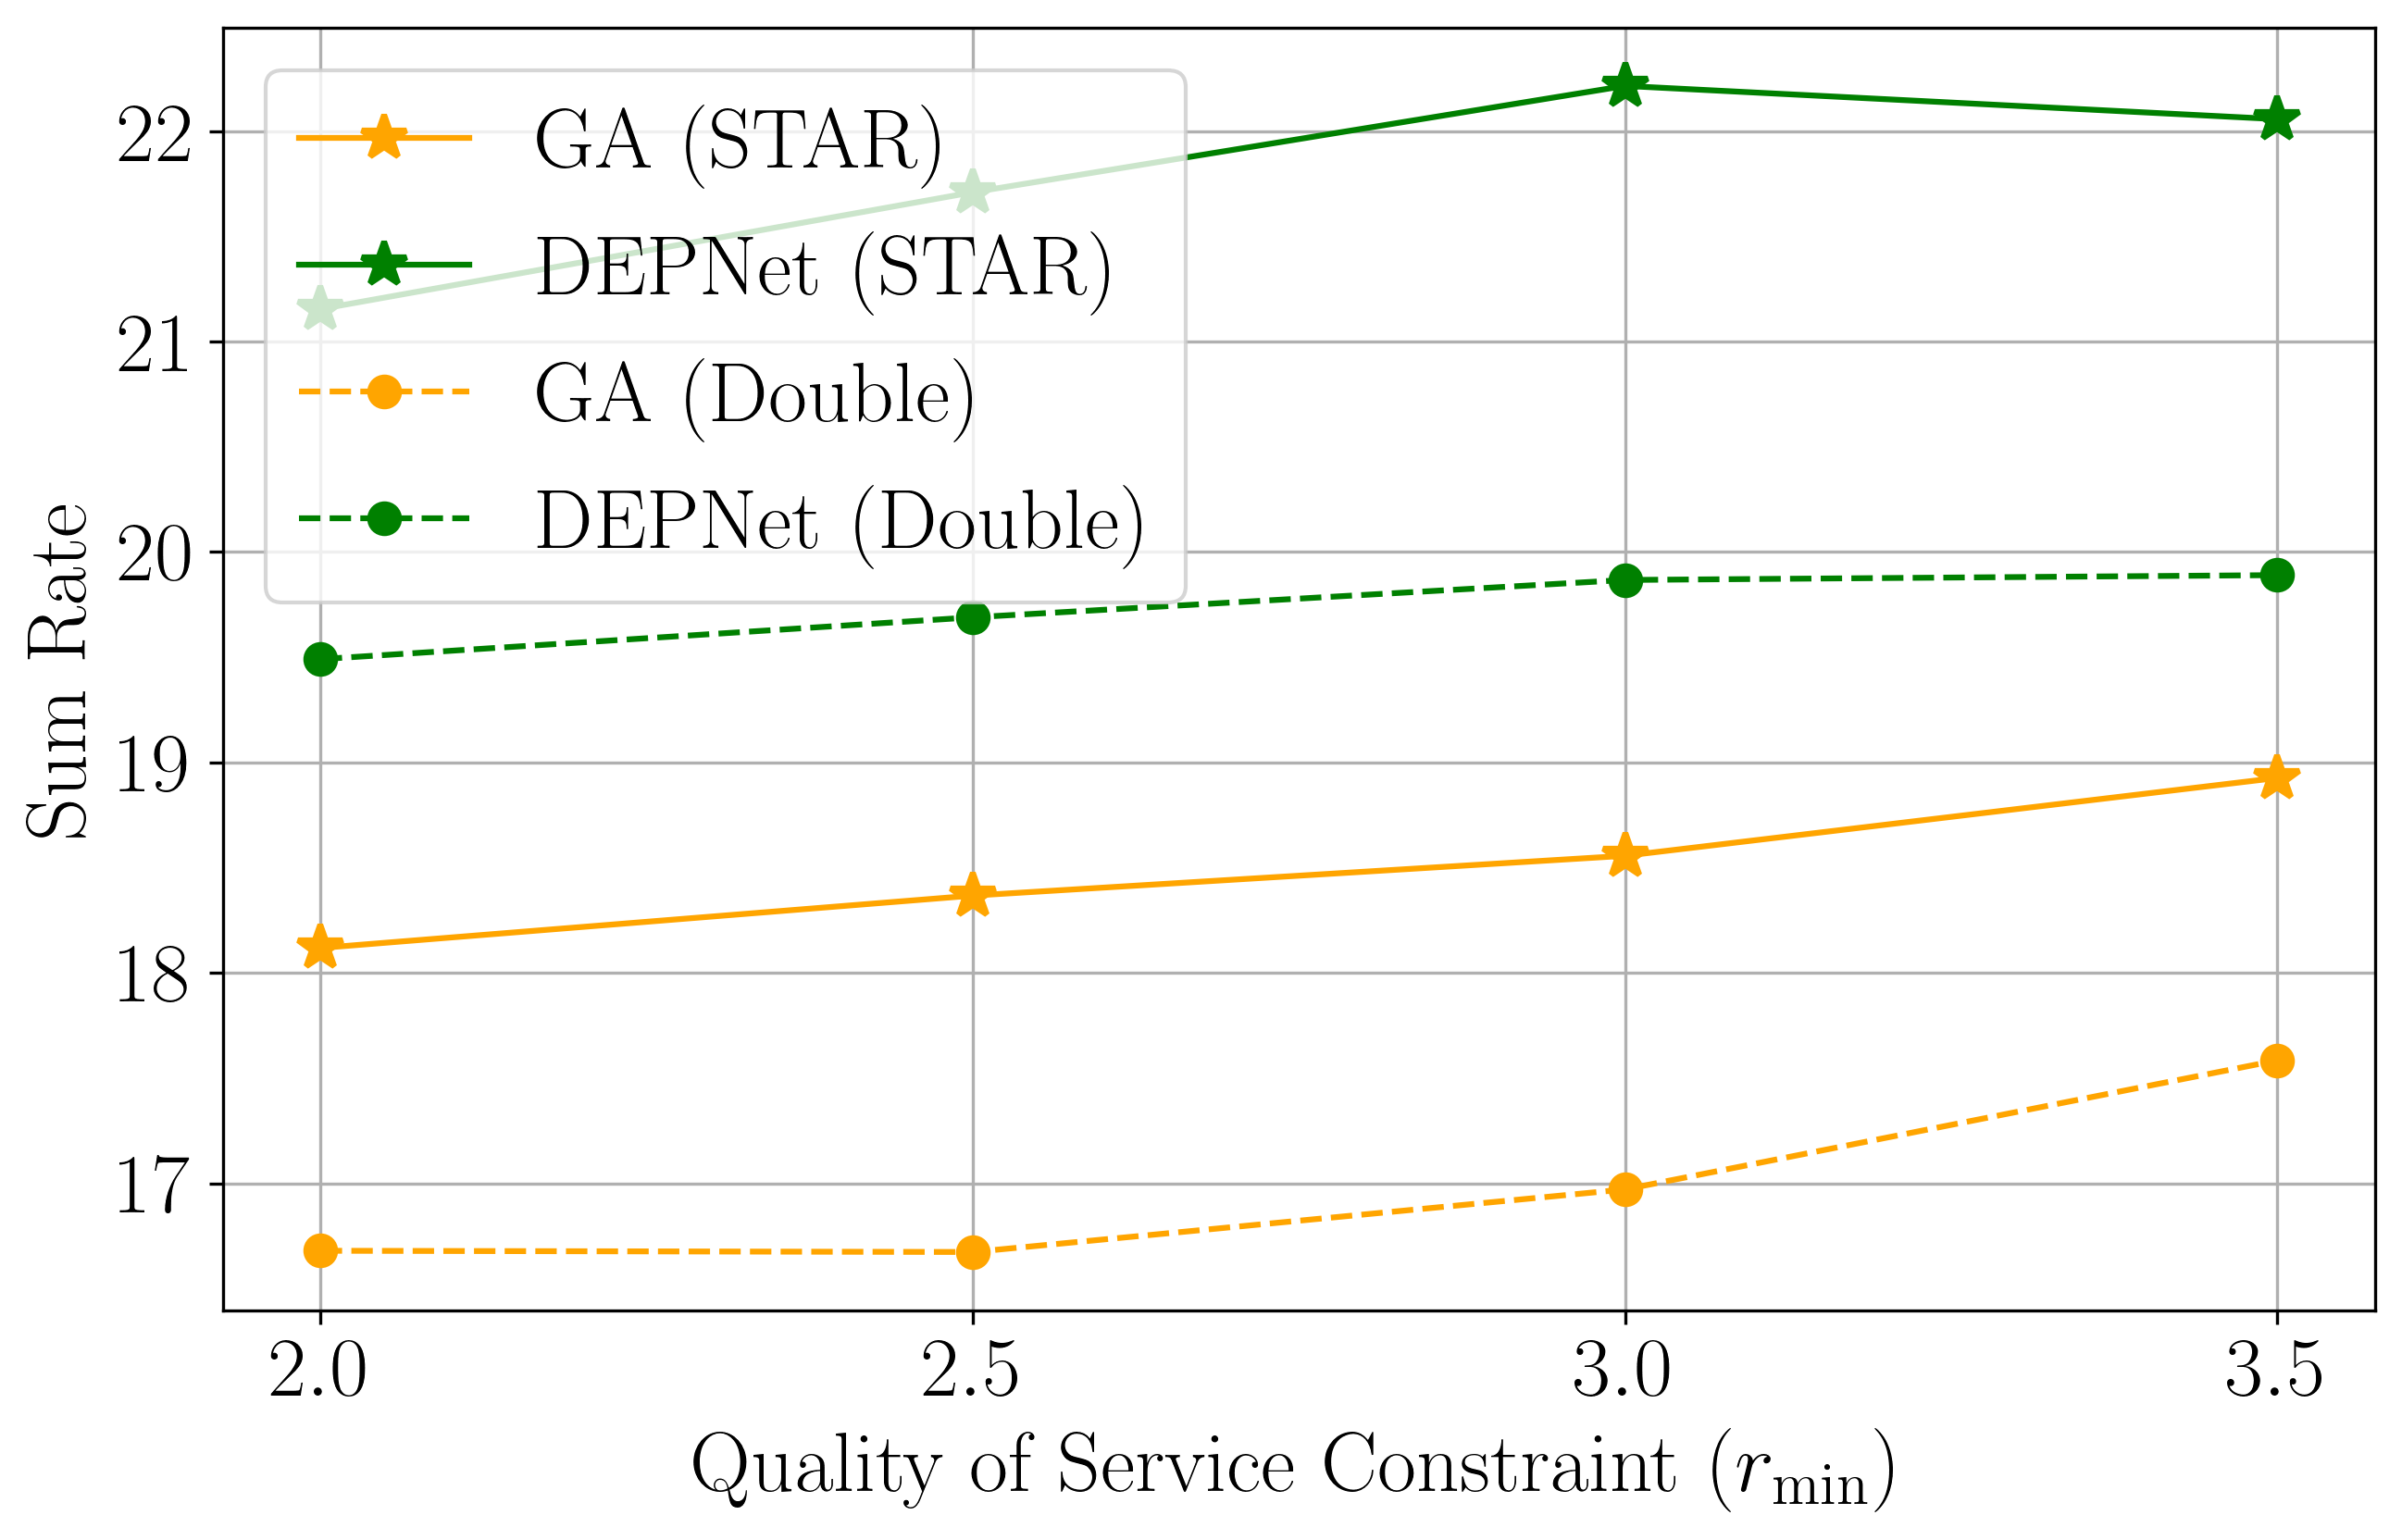

In [12]:
r_mins = [2, 2.5, 3, 3.5]
x_values = r_mins
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}
new_dataset_ids = [dataset_ids[r_min][2] for r_min in r_mins]

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})


# Get the dataset ids for the r_min value
datasets = new_dataset_ids

# Get the data
DEPNet_star = [dnn_res_500[str(dataset)][mode[0]][0] for dataset in datasets]
DEPNet_double = [dnn_res_500[str(dataset)][mode[1]][0] for dataset in datasets]
GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]

# Create the plot
plt.figure(figsize=(10, 6), dpi=300)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_star, marker='*', linestyle='-', color='orange', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='green', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)

# Plot the first line with linear interpolation between points
plt.plot(x_values, GA_double, marker='o', linestyle='--', color='orange', label='GA (Double)', markersize=8)

# Plot the second line with linear interpolation between points
plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='green', label='DEPNet (Double)', markersize=8)

# plt.title(f"Sum Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
plt.xlabel('Quality of Service Constraint ($r_{\\min}$)', fontsize=22)
plt.ylabel('Sum Rate', fontsize=22)
plt.tick_params(axis='x', labelsize=22)  # for x-axis
plt.tick_params(axis='y', labelsize=22)  # for y-axis
plt.xticks(x_values)

# Show legend
plt.legend(fontsize=22)

# Show grid
plt.grid(True)

# Save plot
save_path = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\p_max_3.png"
plt.savefig(save_path, dpi=300)

# Display the plot
plt.show()
plt.close()


### 100 Iteration Plots

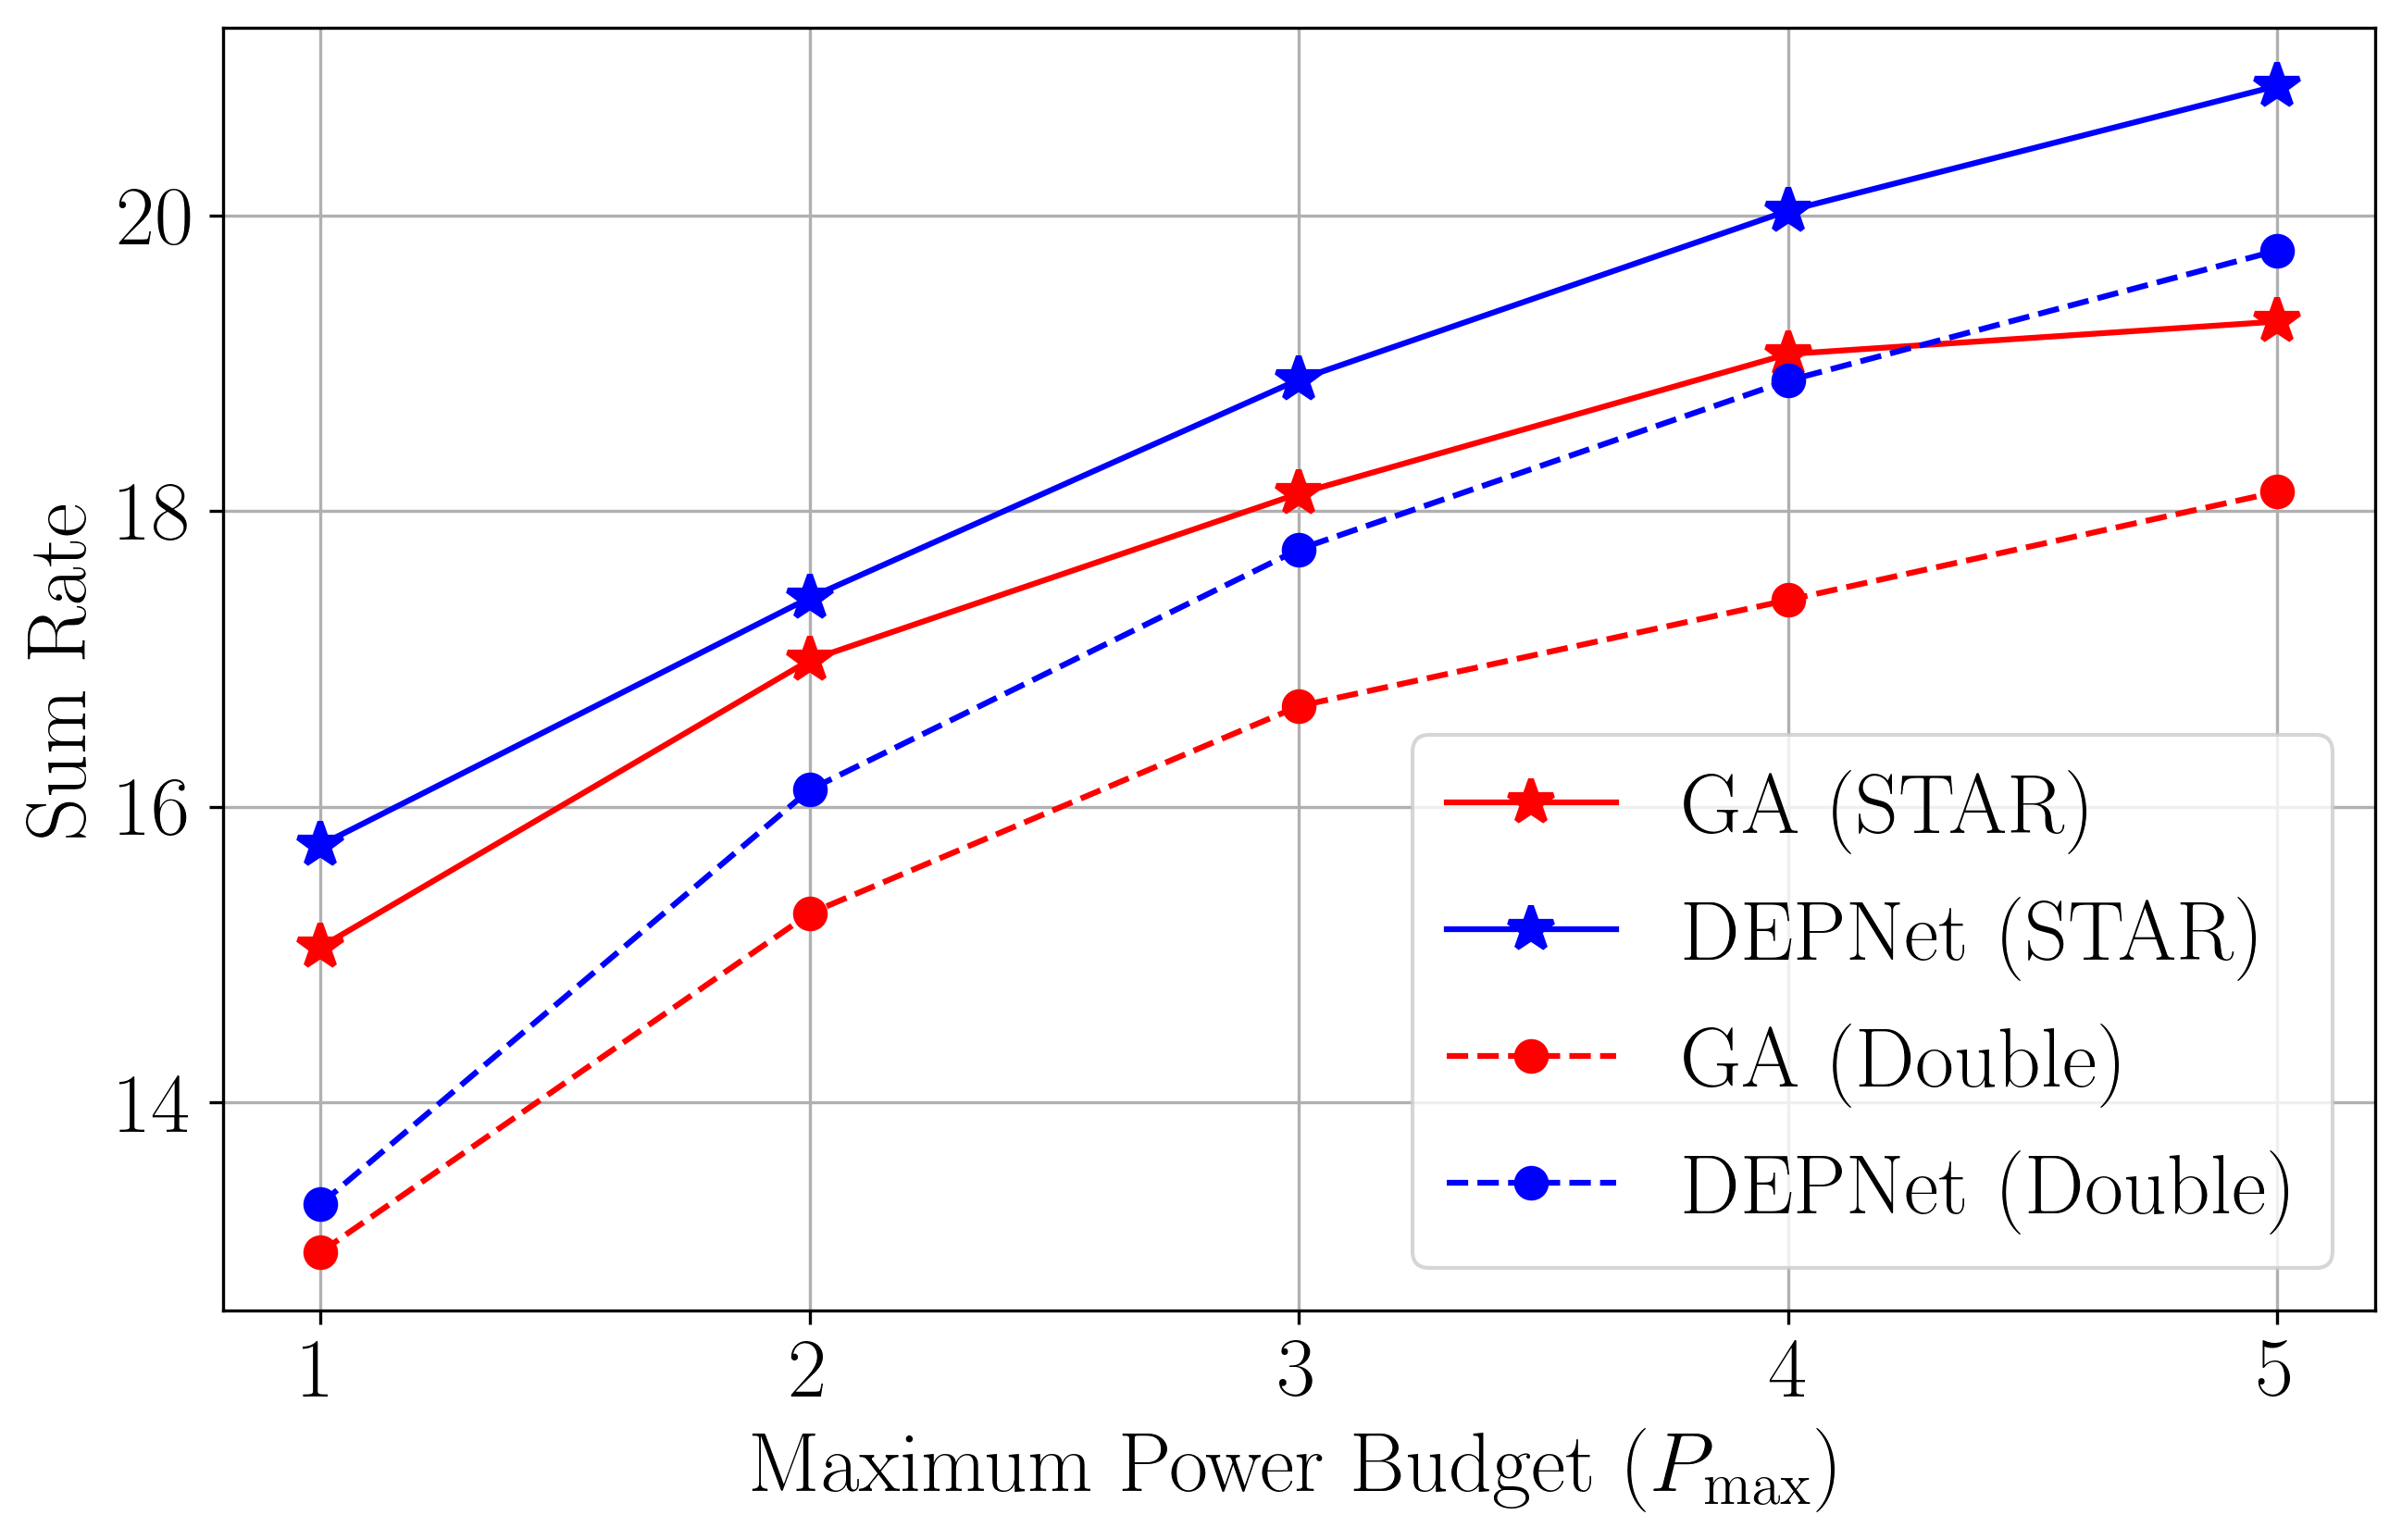

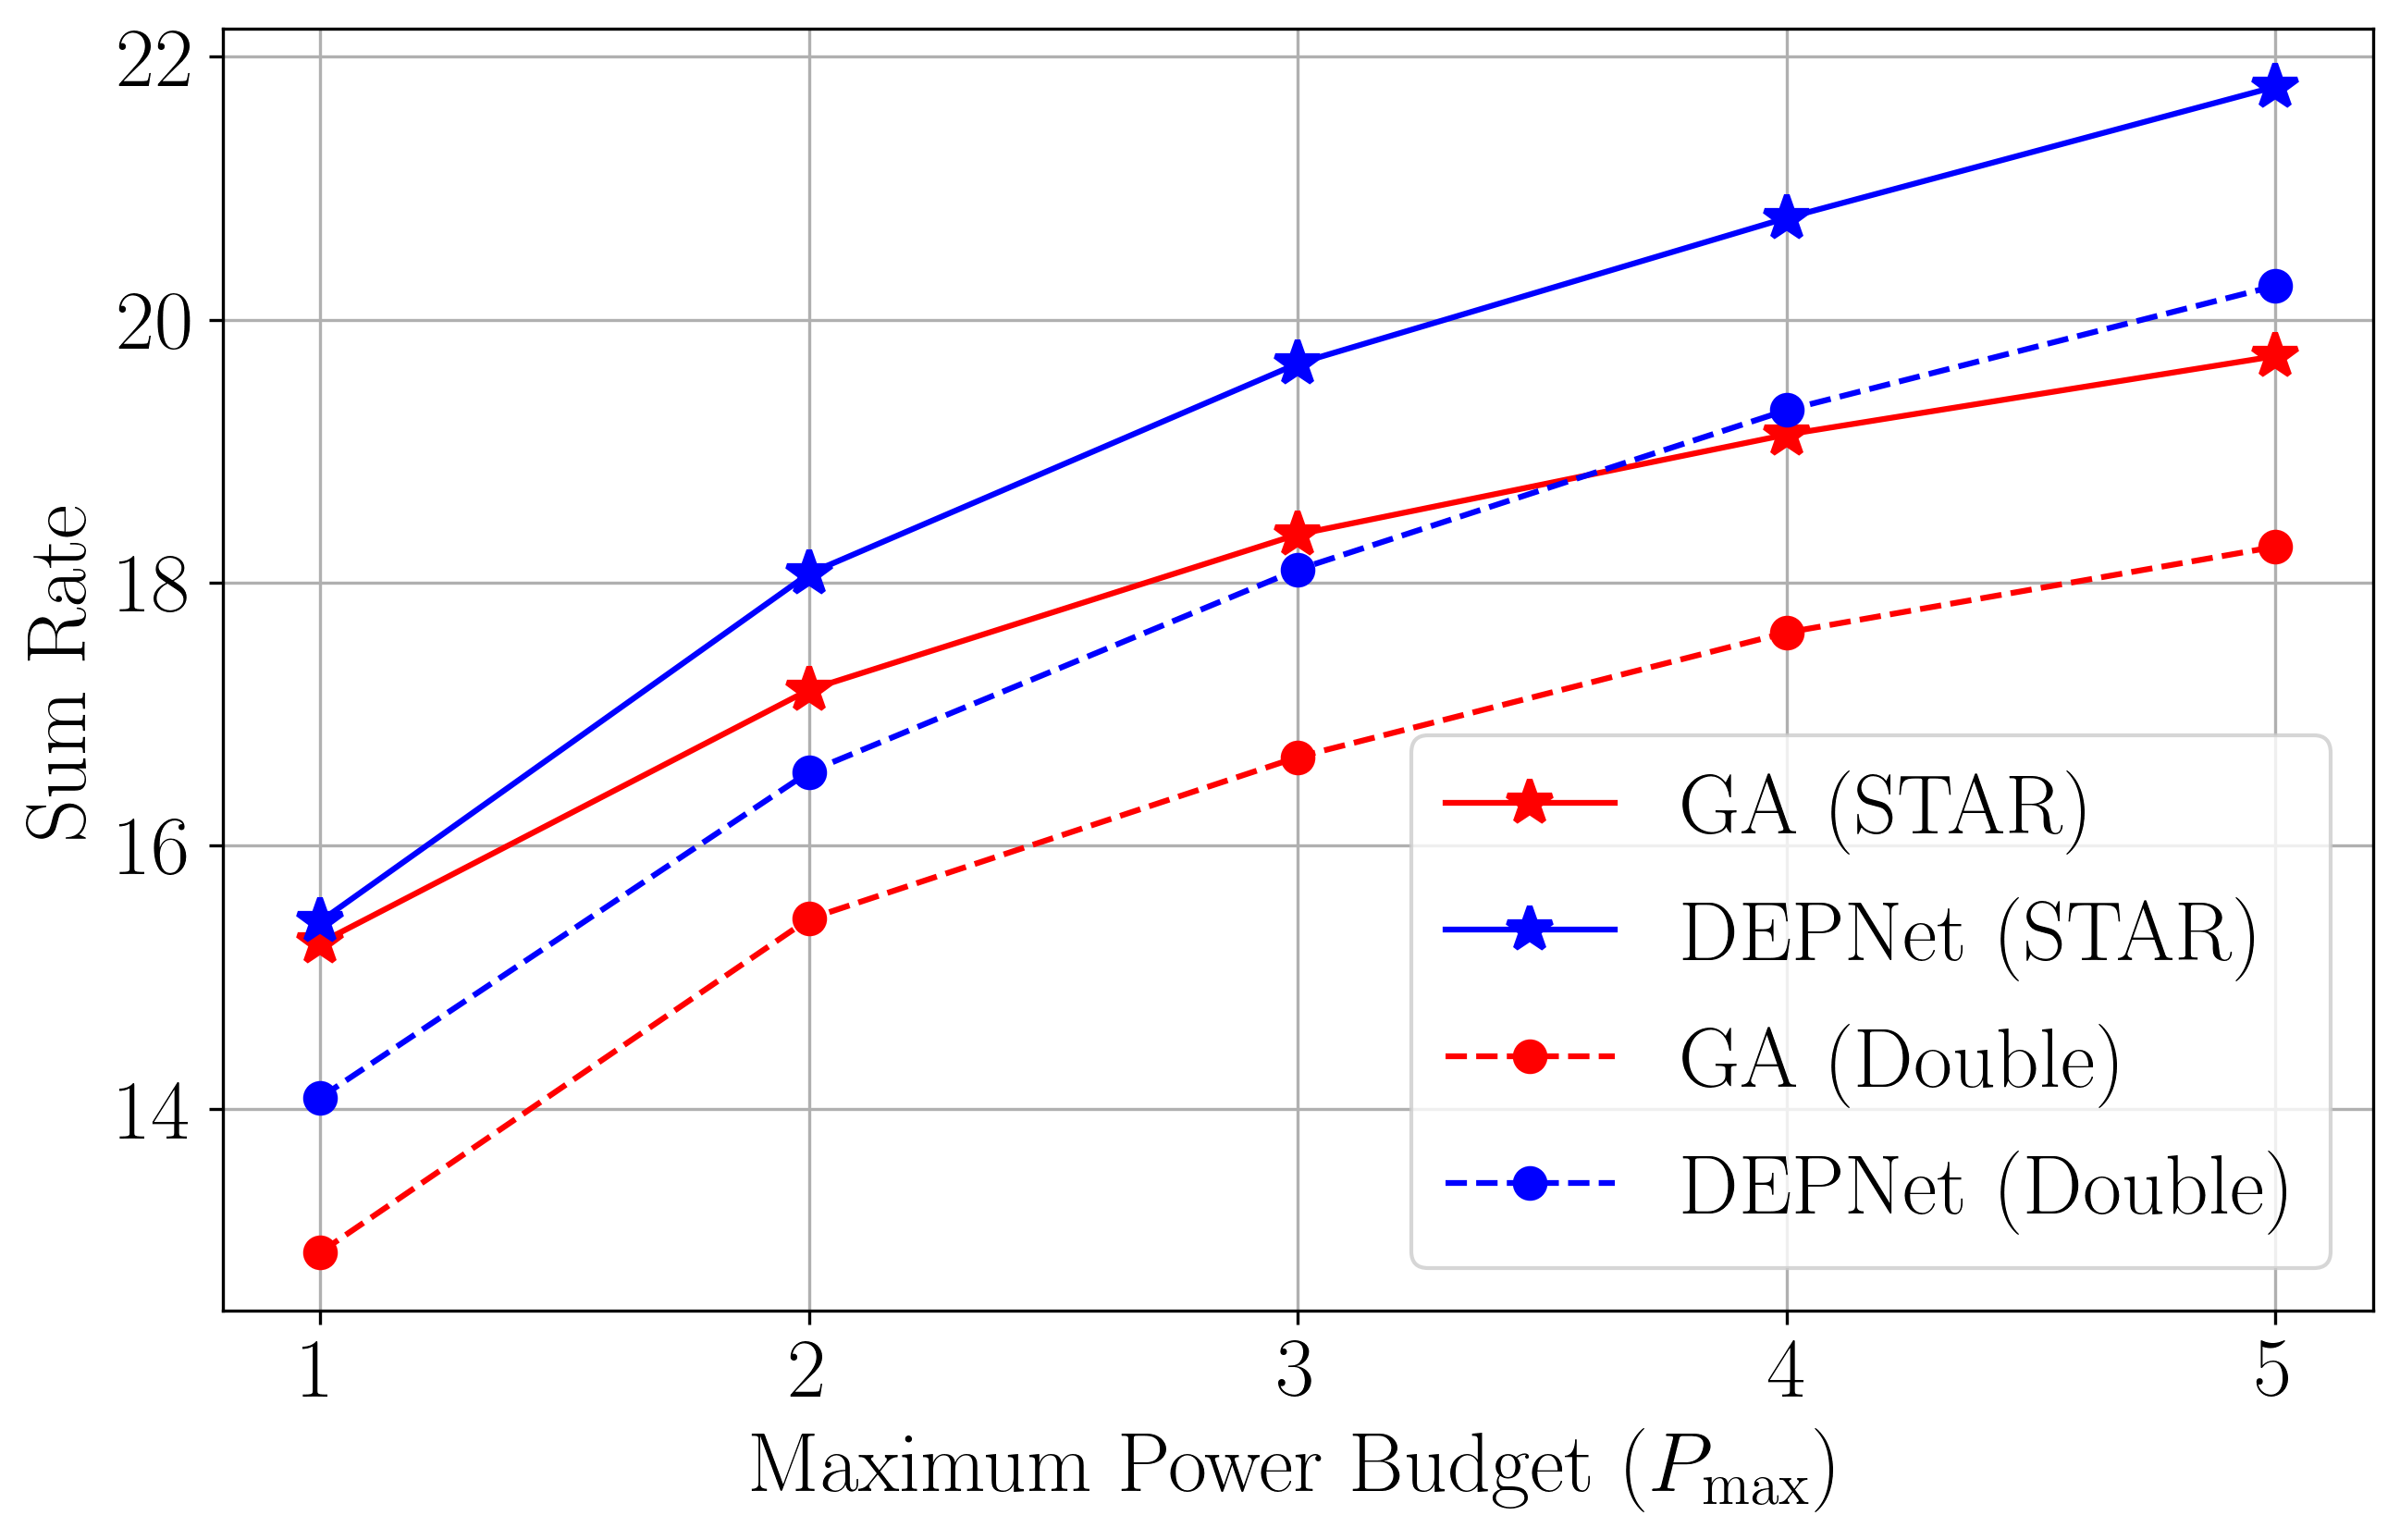

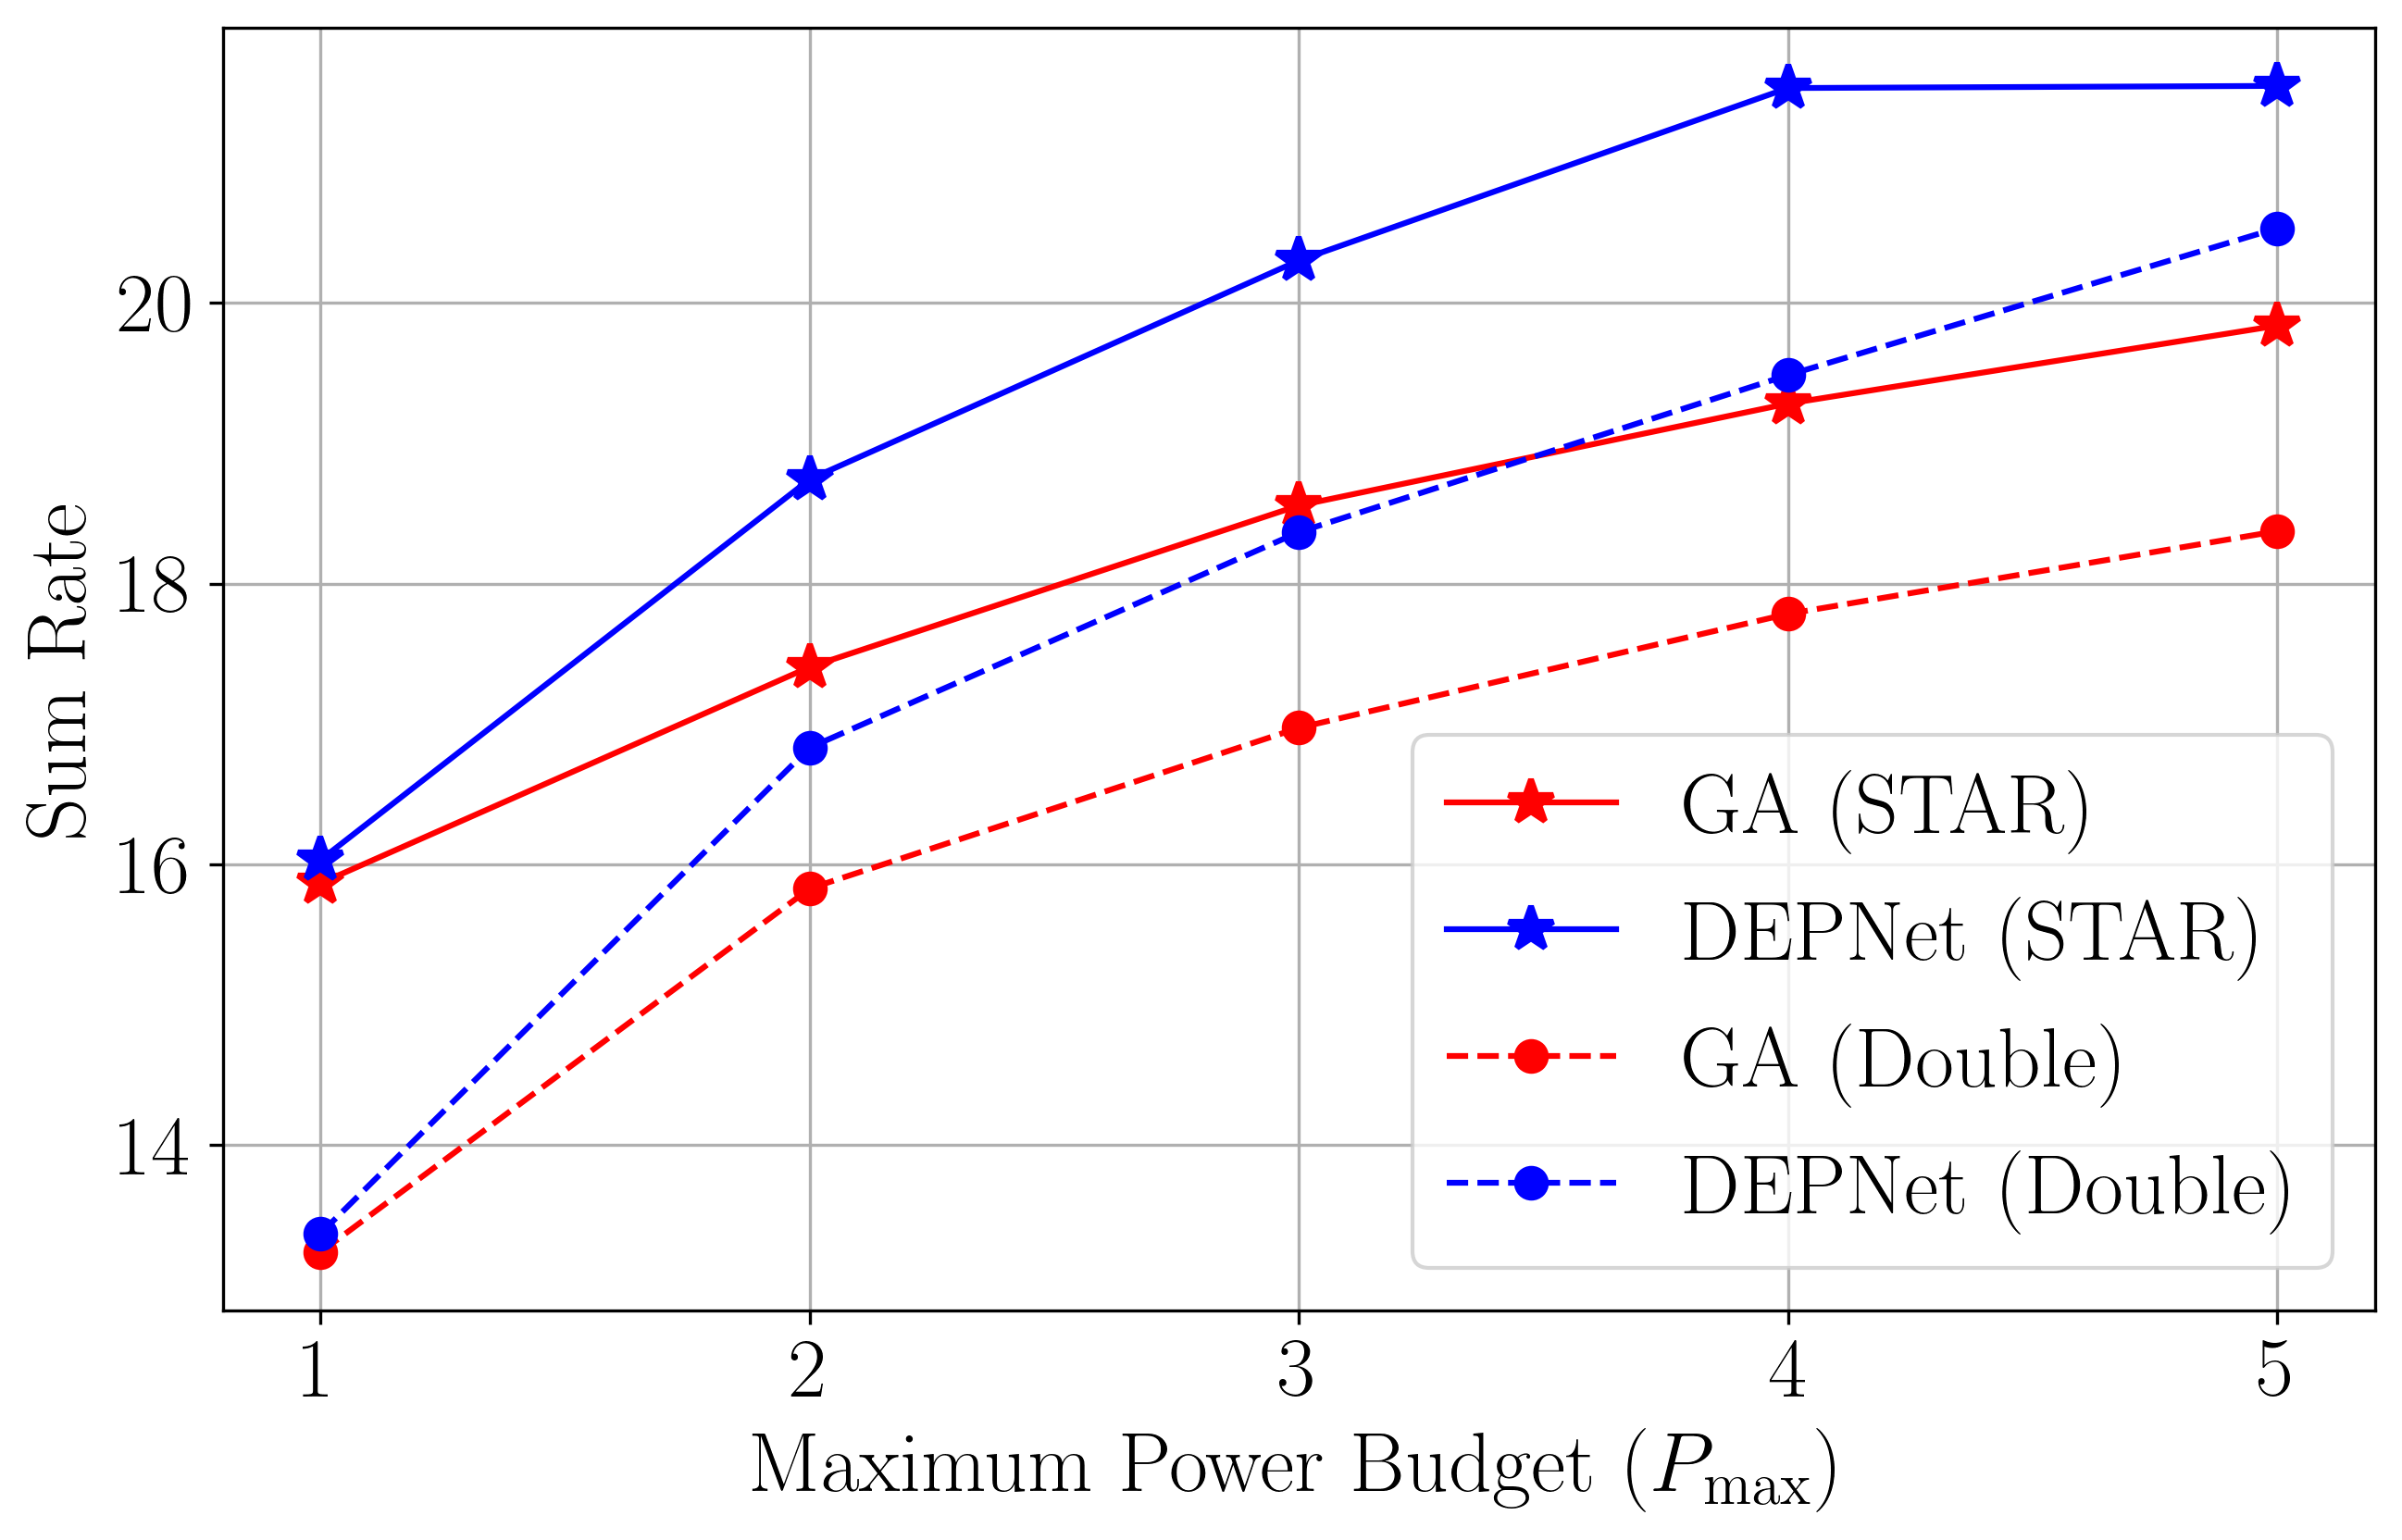

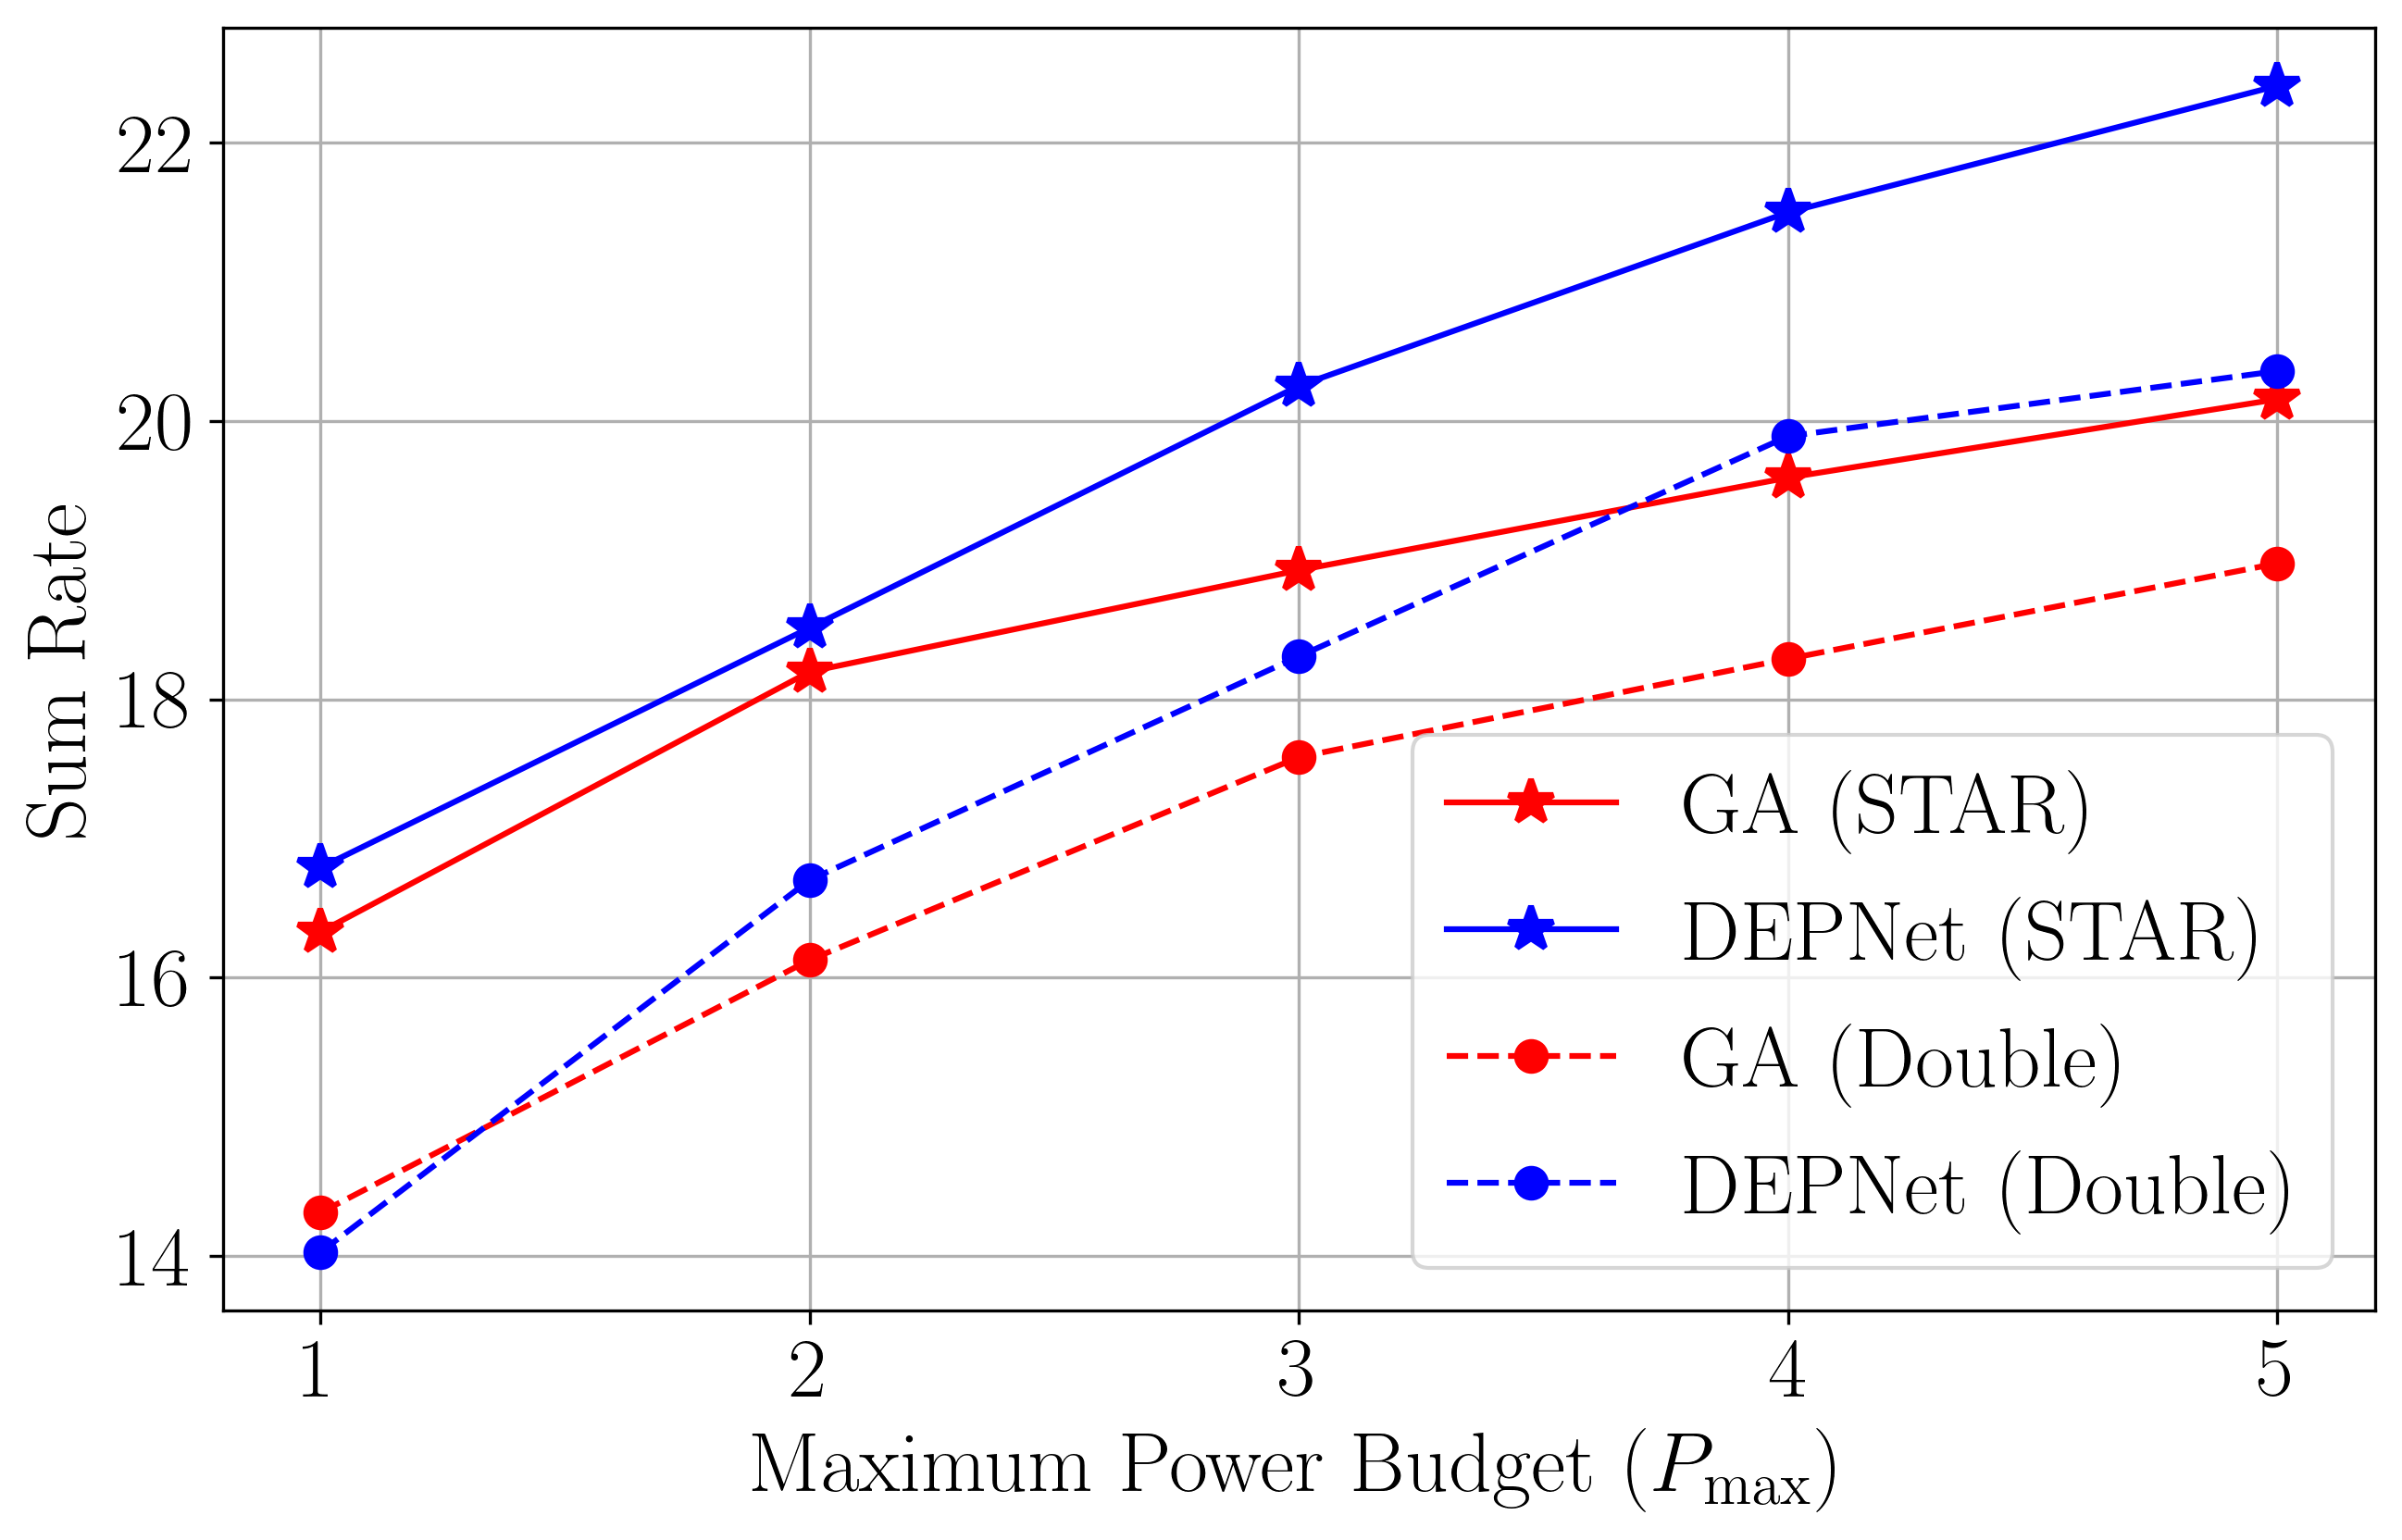

In [11]:
# Make a different graph for each r_min value and RIS mode (STAR, Double). 
# Plot P_max on the x-axis and sumrate on the y-axis, and a different line for GA and DEPNet.

# Data for two lines
x_values = range(1, 6)

r_mins = [2, 2.5, 3, 3.5]
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

for r_min in r_mins:
    
    # Get the dataset ids for the r_min value
    datasets = dataset_ids[r_min]
    
    # Get the data
    DEPNet_star = [dnn_res_100[str(dataset)][mode[0]][0] for dataset in datasets]
    DEPNet_double = [dnn_res_100[str(dataset)][mode[1]][0] for dataset in datasets]
    GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
    GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]
    
    # Create the plot
    plt.figure(figsize=(10, 6), dpi=300)

    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)
    
    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)
    
    # plt.title(f"Sum Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
    plt.xlabel('Maximum Power Budget ($P_{\\max}$)', fontsize=22)
    plt.ylabel('Sum Rate', fontsize=22)
    plt.tick_params(axis='x', labelsize=22)  # for x-axis
    plt.tick_params(axis='y', labelsize=22)  # for y-axis

    # Show legend
    plt.legend(fontsize=22)

    # Show grid
    plt.grid(True)

    # Save plot
    save_path = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\100_iter\\{r_min}.png"
    plt.savefig(save_path, dpi=300)
    
    # Display the plot
    plt.show()
    plt.close()


### 500 Iteration Plots

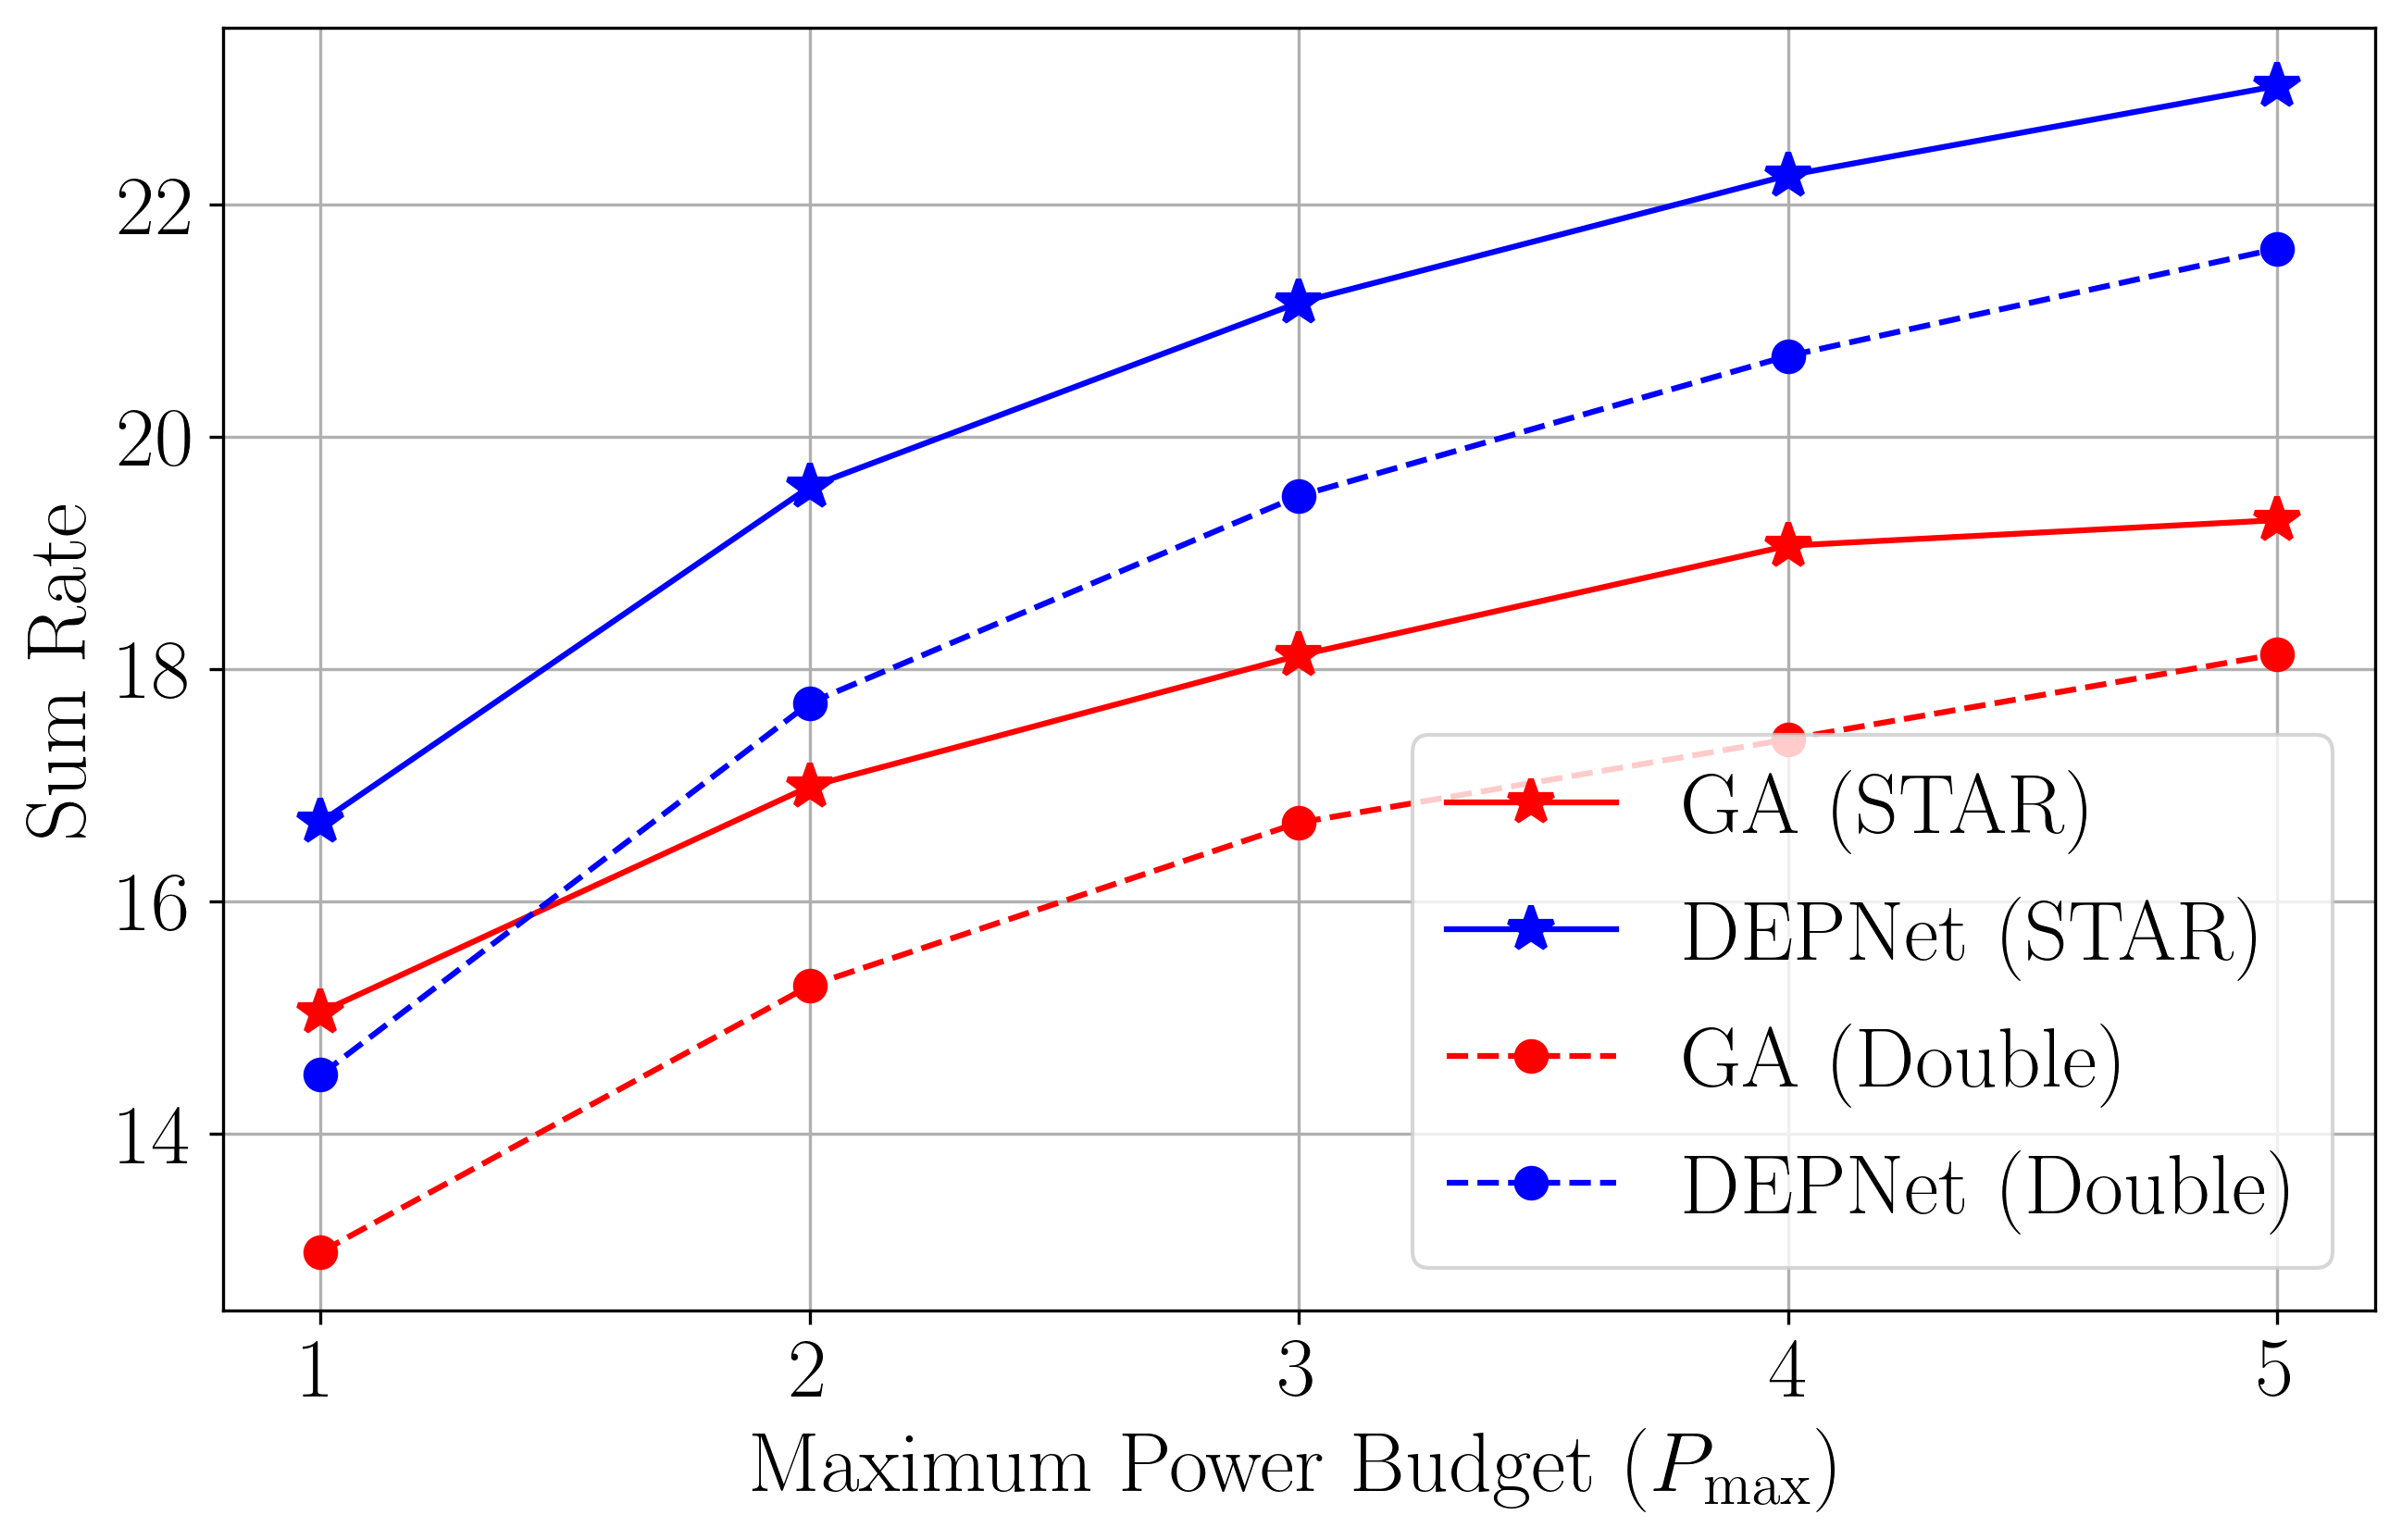

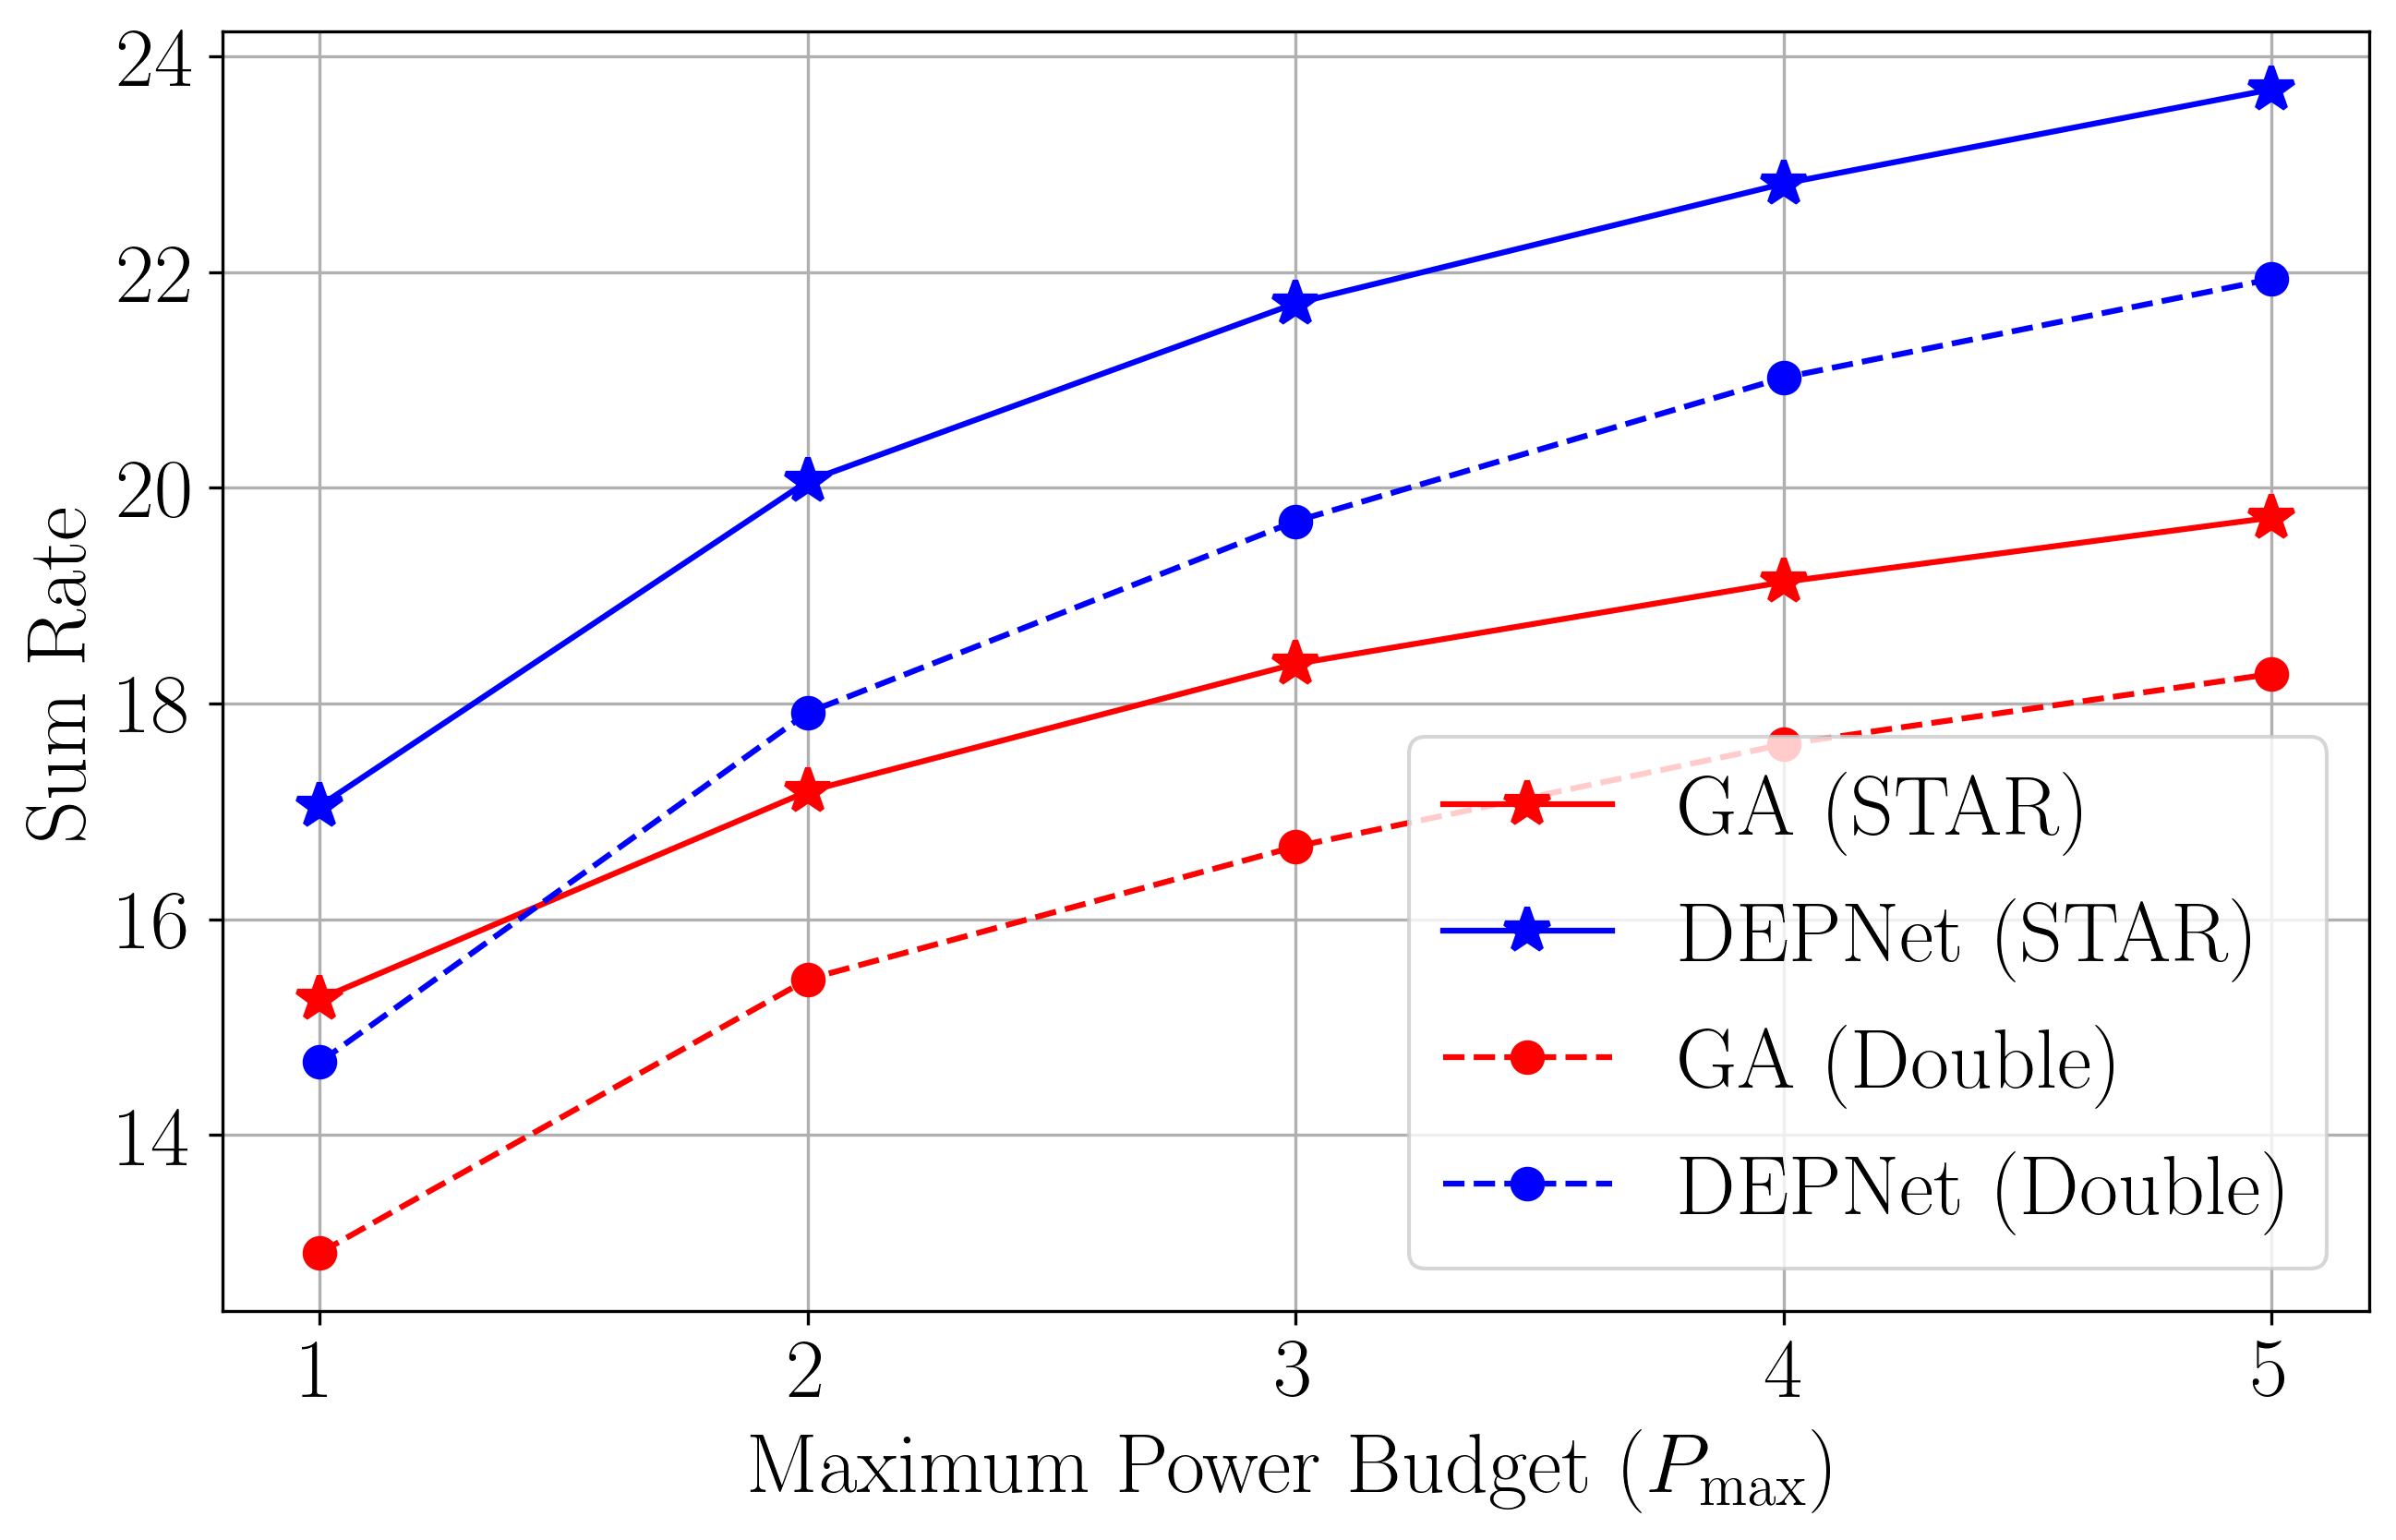

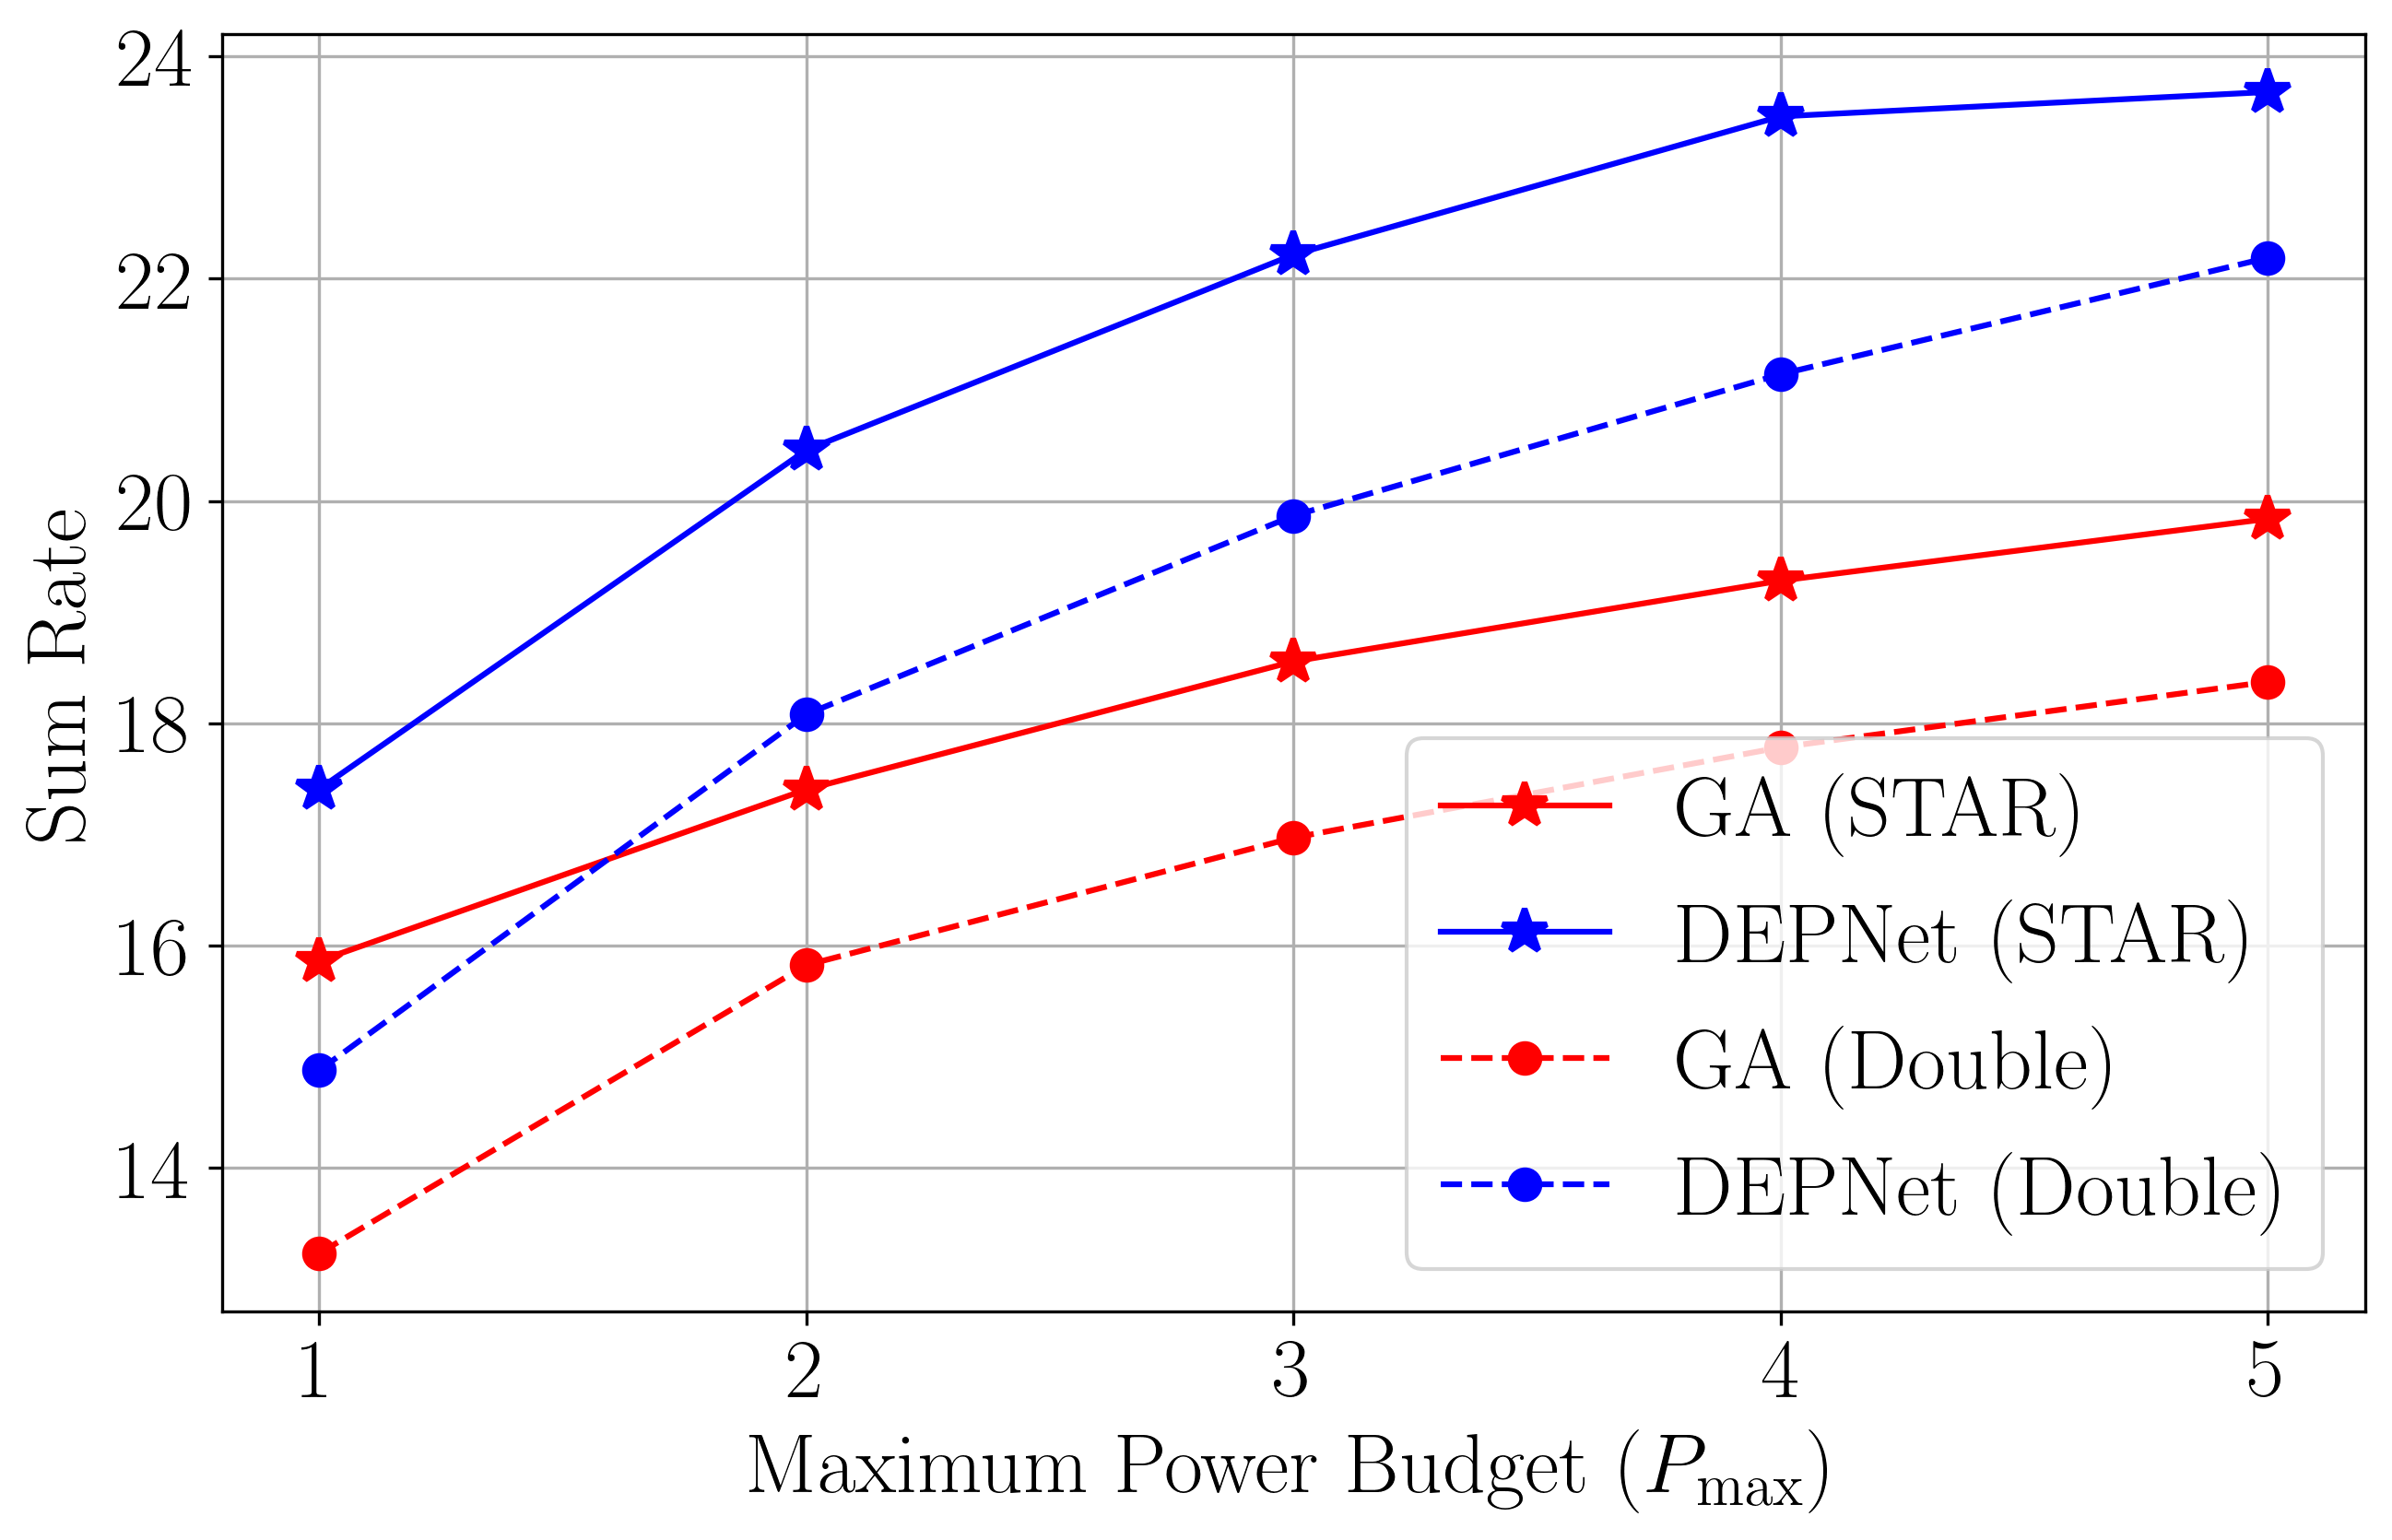

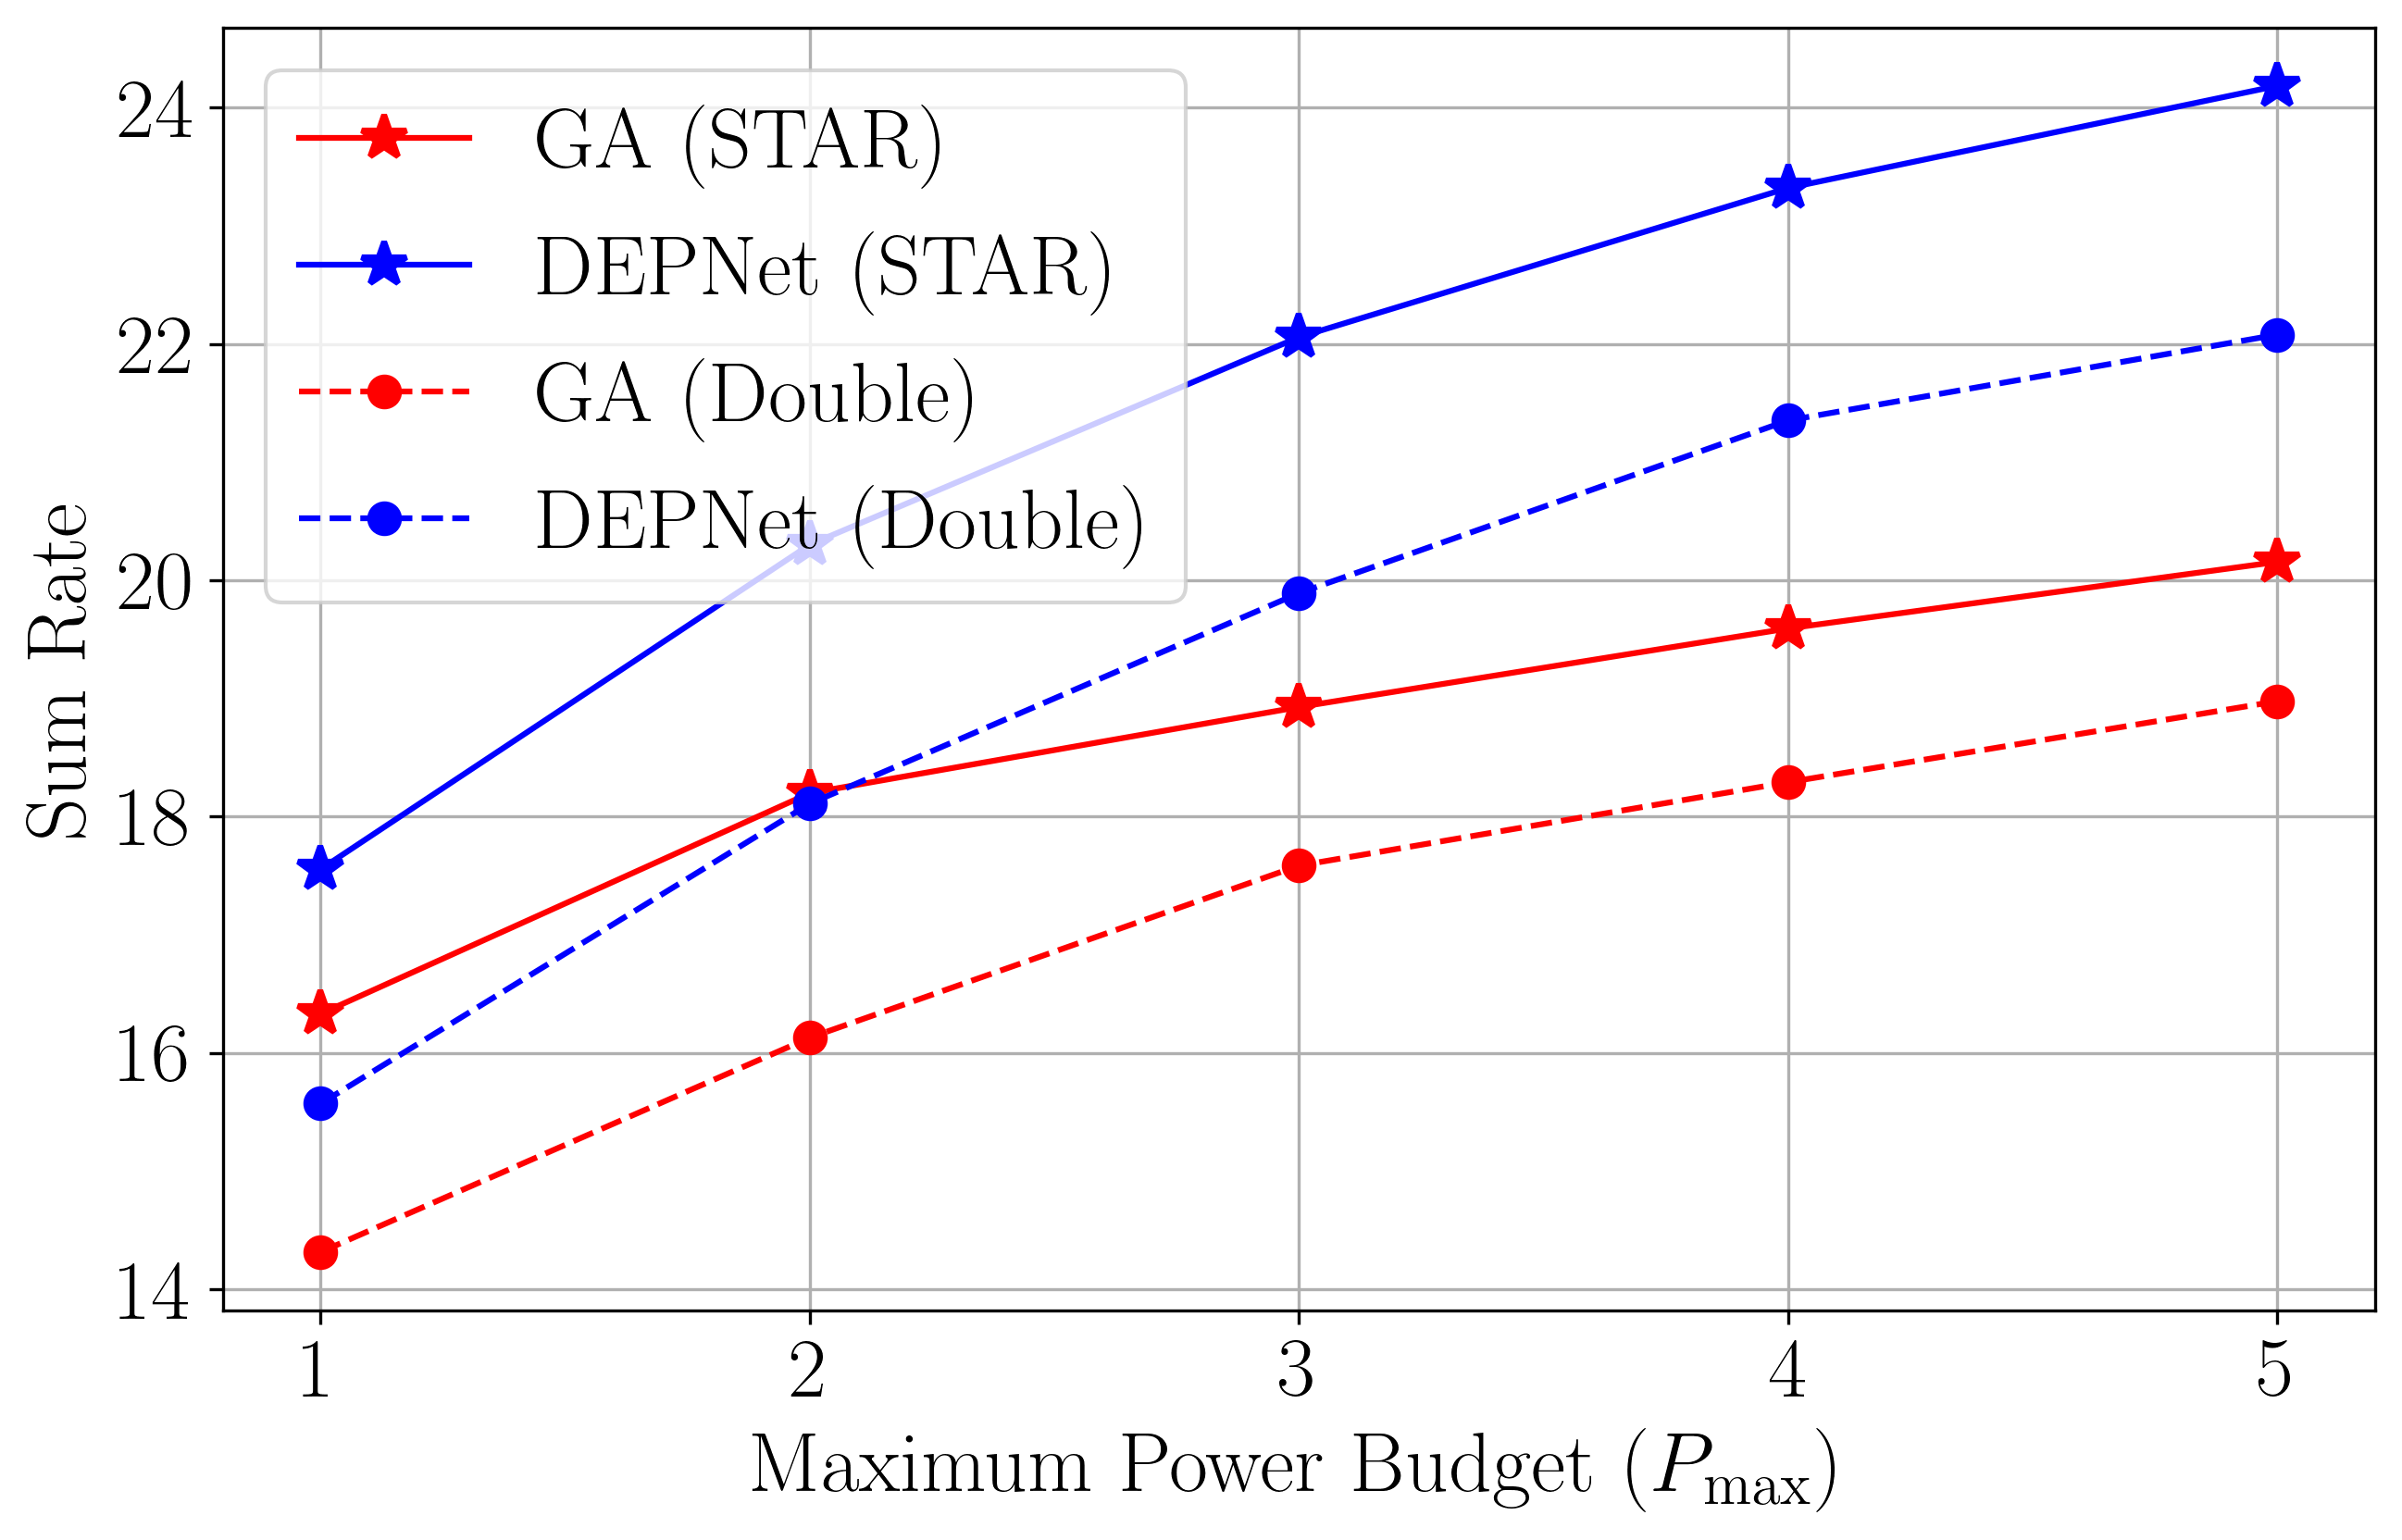

In [31]:
# Make a different graph for each r_min value and RIS mode (STAR, Double). 
# Plot P_max on the x-axis and sumrate on the y-axis, and a different line for GA and DEPNet.

# Data for two lines
x_values = range(1, 6)

r_mins = [2, 2.5, 3, 3.5]
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

for r_min in r_mins:
    
    # Get the dataset ids for the r_min value
    datasets = dataset_ids[r_min]
    
    # Get the data
    DEPNet_star = [dnn_res_500[str(dataset)][mode[0]][0] for dataset in datasets]
    DEPNet_double = [dnn_res_500[str(dataset)][mode[1]][0] for dataset in datasets]
    GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
    GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]
    
    # Create the plot
    plt.figure(figsize=(10, 6), dpi=300)

    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)
    
    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)
    
    # plt.title(f"Sum Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
    plt.xlabel('Maximum Power Budget ($P_{\\max}$)', fontsize=22)
    plt.ylabel('Sum Rate', fontsize=22)
    plt.tick_params(axis='x', labelsize=22)  # for x-axis
    plt.tick_params(axis='y', labelsize=22)  # for y-axis

    # Show legend
    plt.legend(fontsize=22)

    # Show grid
    plt.grid(True)

    # Save plot
    save_path = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\{r_min}.png"
    plt.savefig(save_path, dpi=300)
    
    # Display the plot
    plt.show()
    plt.close()


### Plotting with $r_{\text{min}}$ on $x-$axis

In [ ]:
# Make a different graph for each r_min value and RIS mode (STAR, Double). 
# Plot P_max on the x-axis and sumrate on the y-axis, and a different line for GA and DEPNet.

r_mins = [2, 2.5, 3, 3.5]
x_values = r_mins
p_max = 3
mode = ["Star", "Double"]
dataset_ids = {2:[6, 7, 8, 9, 10], 2.5:[11, 12, 13, 14, 15], 3:[16, 17, 18, 19, 20], 3.5:[21, 22, 23, 24, 25]}

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.family": "serif"
})

for r_min in r_mins:
    
    # Get the dataset ids for the r_min value
    datasets = dataset_ids[r_min]
    
    # Get the data
    DEPNet_star = [dnn_res_500[str(dataset)][mode[0]][0] for dataset in datasets]
    DEPNet_double = [dnn_res_500[str(dataset)][mode[1]][0] for dataset in datasets]
    GA_star = [ga[str(dataset)][mode[0]]["R"] for dataset in datasets]
    GA_double = [ga[str(dataset)][mode[1]]["R"] for dataset in datasets]
    
    # Create the plot
    plt.figure(figsize=(10, 6), dpi=300)

    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_star, marker='*', linestyle='-', color='red', label='GA (STAR)', markersize=12, markeredgewidth=1.5)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_star, marker='*', linestyle='-', color='blue', label='DEPNet (STAR)', markersize=12, markeredgewidth=1.5)
    
    # Plot the first line with linear interpolation between points
    plt.plot(x_values, GA_double, marker='o', linestyle='--', color='red', label='GA (Double)', markersize=8)

    # Plot the second line with linear interpolation between points
    plt.plot(x_values, DEPNet_double, marker='o', linestyle='--', color='blue', label='DEPNet (Double)', markersize=8)
    
    # plt.title(f"Sum Rate over $P_{{\\max}}$ for $r_{{\\min}}$ = {r_min}", fontsize=22)
    plt.xlabel('Maximum Power Budget ($P_{\\max}$)', fontsize=22)
    plt.ylabel('Sum Rate', fontsize=22)
    plt.tick_params(axis='x', labelsize=22)  # for x-axis
    plt.tick_params(axis='y', labelsize=22)  # for y-axis

    # Show legend
    plt.legend(fontsize=22)

    # Show grid
    plt.grid(True)

    # Save plot
    save_path = f"C:\\Users\\xmoot\\Desktop\\VSCode\\star-ris-optim\\New_Plots\\500_iter\\{r_min}.png"
    plt.savefig(save_path, dpi=300)
    
    # Display the plot
    plt.show()
    plt.close()
